In [1305]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_predict
from sklearn.cluster import KMeans

In [760]:
# Read the data as a data frame 

df_concrete = pd.read_csv("concrete.csv")
df_concrete.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

### Understanding the data

In [761]:
df_concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [762]:
df_concrete.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [763]:
df_concrete.shape

(1030, 9)

In [764]:
df_concrete.describe().transpose()

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

Checking for mising values

In [765]:
df_concrete.isnull().values.sum()

0

### Univarient Analysis

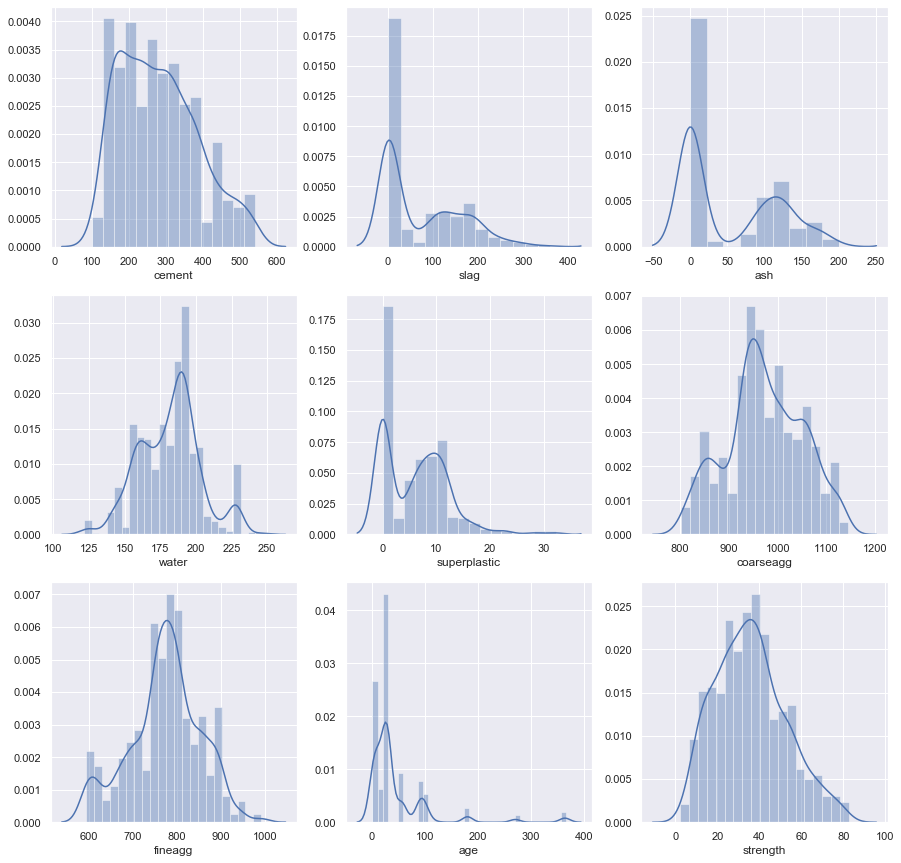

In [766]:
plt.figure(figsize=(15,15))
pos = 1
for i in df_concrete.columns:
    plt.subplot(3, 3, pos)
    sns.distplot(df_concrete[i])
    pos += 1 

The data is almost normally distributed with some skewness in few attributes which may be due to presence of outliers

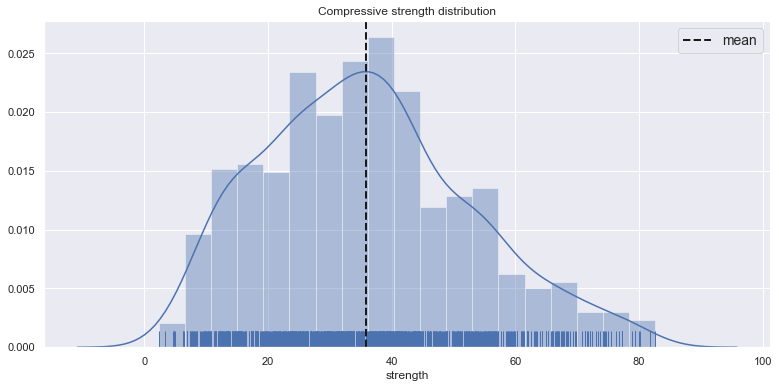

In [767]:
plt.figure(figsize=(13,6))
sns.distplot(df_concrete["strength"],color="b",rug=True)
plt.axvline(df_concrete["strength"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Compressive strength distribution")
plt.show()

Target column looks quite balanced

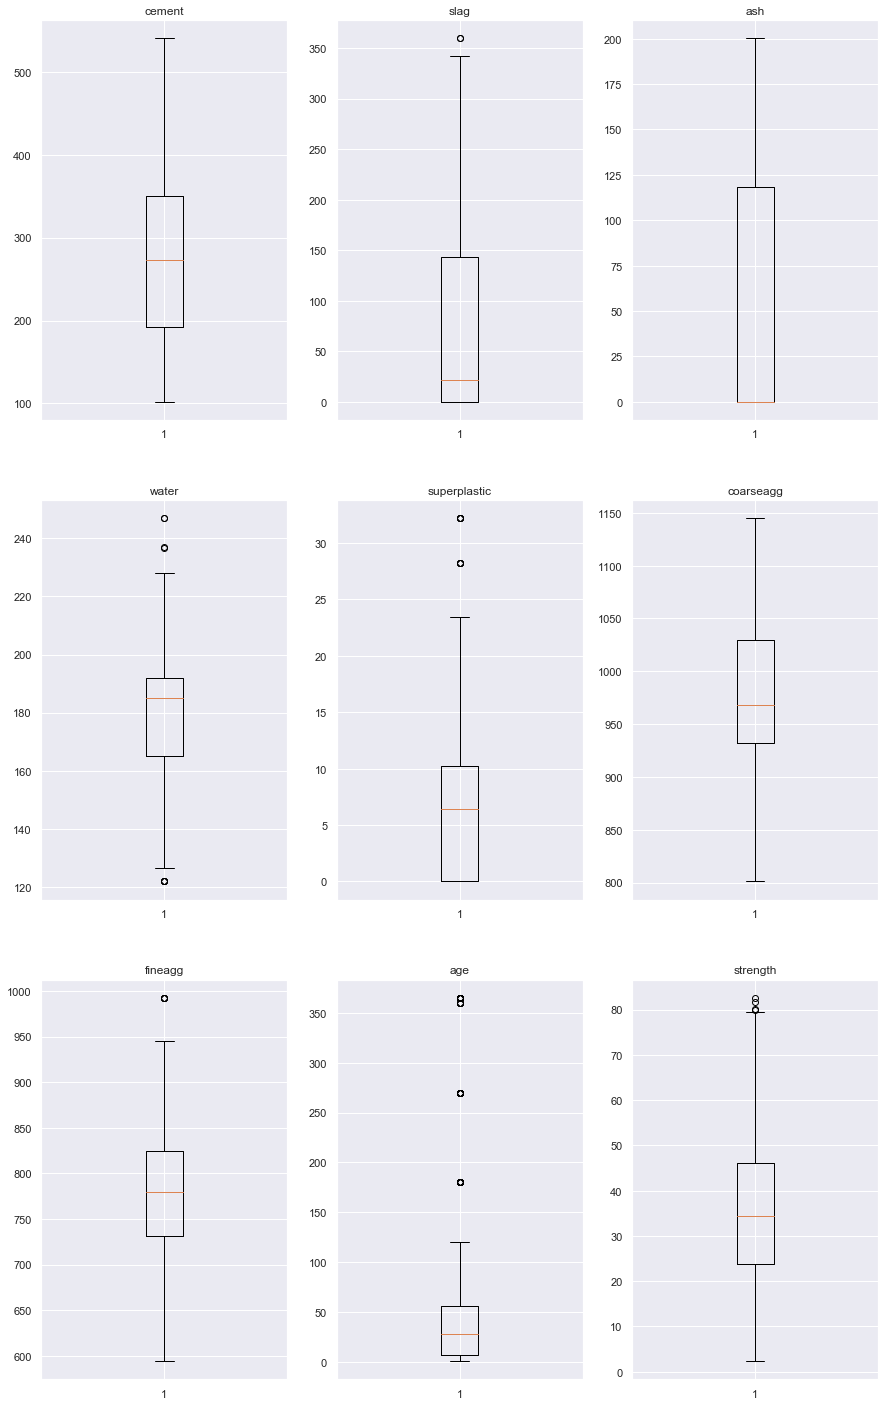

In [768]:
fig, axs = plt.subplots(3, 3, figsize = (15,25))

axs[0, 0].boxplot(df_concrete.cement)
axs[0, 0].set_title('cement')

axs[0, 1].boxplot(df_concrete.slag)
axs[0, 1].set_title('slag')

axs[0, 2].boxplot(df_concrete.ash)
axs[0, 2].set_title('ash')

axs[1, 0].boxplot(df_concrete.water)
axs[1, 0].set_title('water')

axs[1, 1].boxplot(df_concrete['superplastic'])
axs[1, 1].set_title('superplastic')

axs[1, 2].boxplot(df_concrete['coarseagg'])
axs[1, 2].set_title('coarseagg')

axs[2, 0].boxplot(df_concrete.fineagg)
axs[2, 0].set_title('fineagg')

axs[2, 1].boxplot(df_concrete.age)
axs[2, 1].set_title('age')

axs[2, 2].boxplot(df_concrete.strength)
axs[2, 2].set_title('strength')

plt.show()

Except the attribute ash, others are more or less normally distributed with few outliers

### Multivarient Analysis

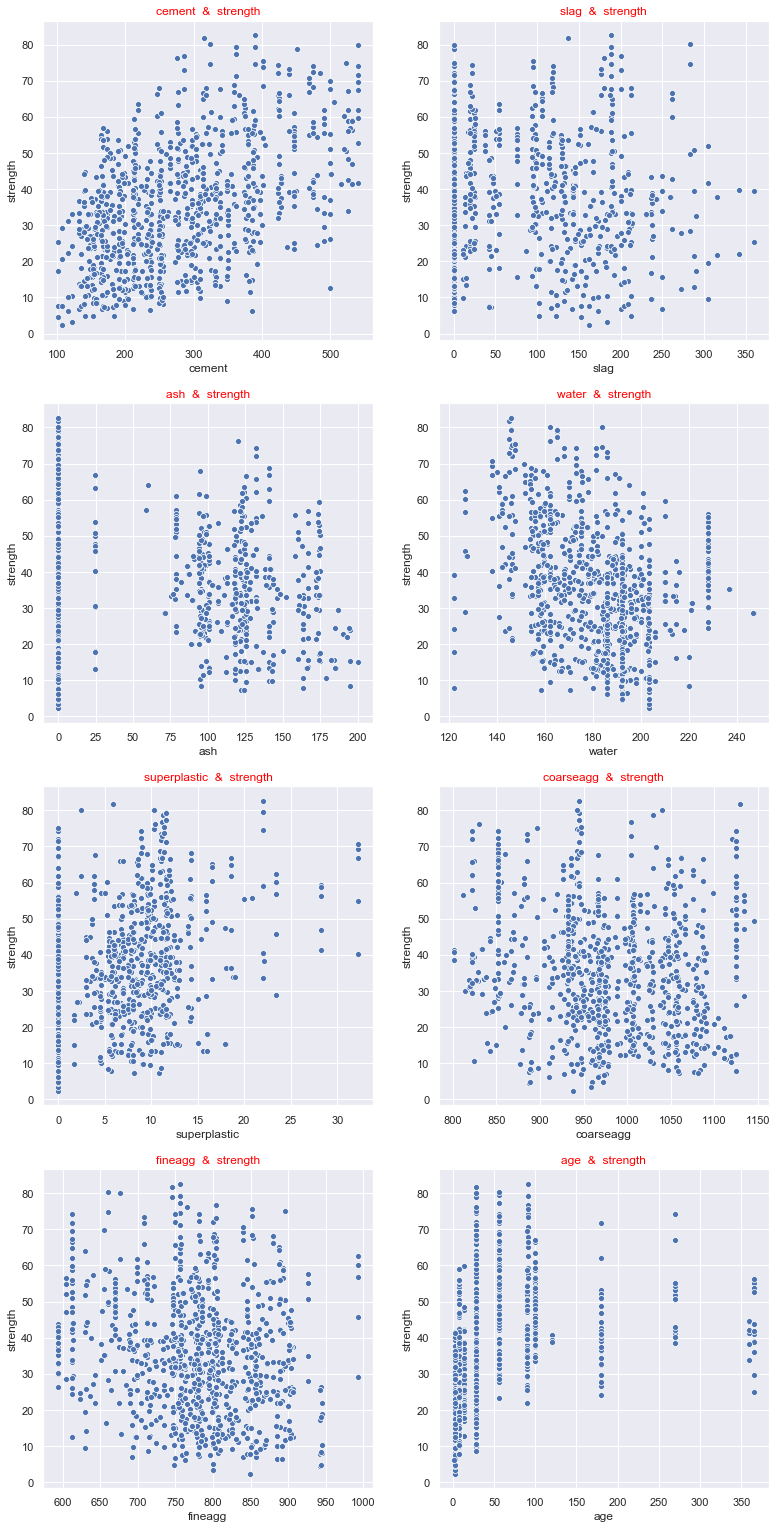

In [769]:
cols = [i for i in df_concrete.columns if i not in 'strength']
length = len(cols)

plt.figure(figsize=(13,27))
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(4,2,j+1)
    sns.scatterplot(df_concrete[i], df_concrete["strength"])
    plt.title(i+"  &  strength",color="red")

<Figure size 864x432 with 0 Axes>

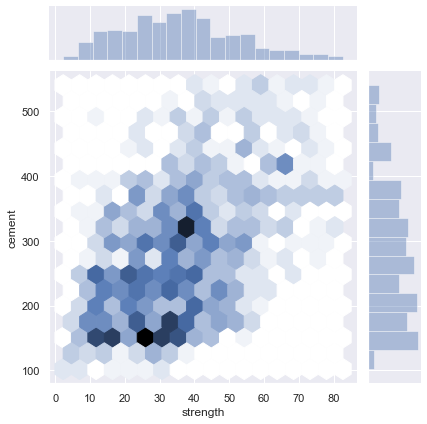

In [770]:
plt.figure(figsize=(12,6))
sns.jointplot(df_concrete["strength"], df_concrete["cement"], kind="hex")

<Figure size 864x432 with 0 Axes>

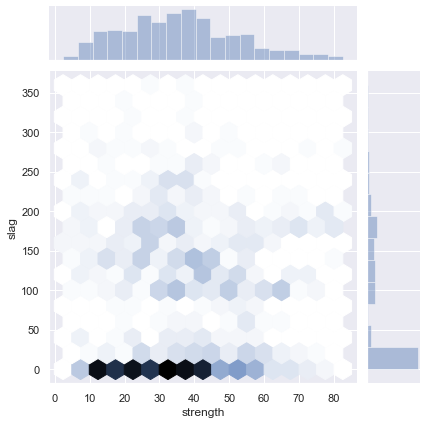

In [771]:
plt.figure(figsize=(12,6))
sns.jointplot(df_concrete["strength"], df_concrete["slag"], kind="hex")

<Figure size 864x432 with 0 Axes>

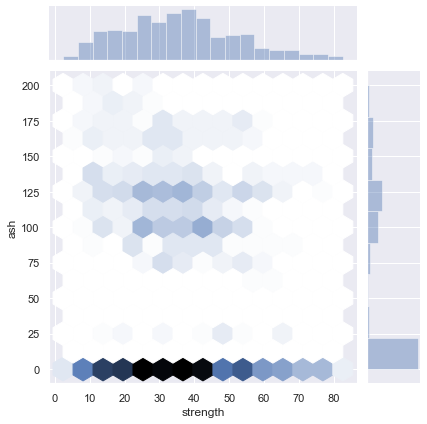

In [772]:
plt.figure(figsize=(12,6))
sns.jointplot(df_concrete["strength"], df_concrete["ash"], kind="hex")

<Figure size 864x432 with 0 Axes>

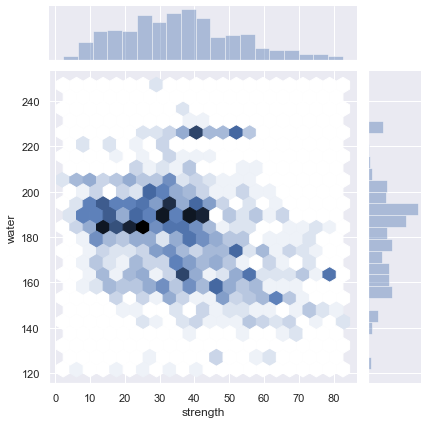

In [773]:
plt.figure(figsize=(12,6))
sns.jointplot(df_concrete["strength"], df_concrete["water"], kind="hex")

<Figure size 864x432 with 0 Axes>

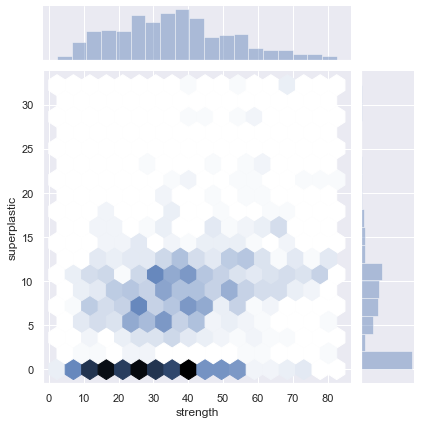

In [774]:
plt.figure(figsize=(12,6))
sns.jointplot(df_concrete["strength"], df_concrete["superplastic"], kind="hex")

<Figure size 864x432 with 0 Axes>

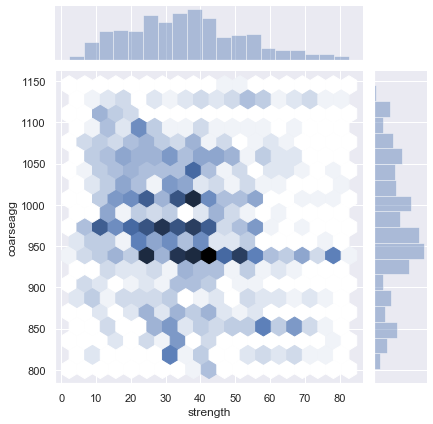

In [775]:
plt.figure(figsize=(12,6))
sns.jointplot(df_concrete["strength"], df_concrete["coarseagg"], kind="hex")

<Figure size 864x432 with 0 Axes>

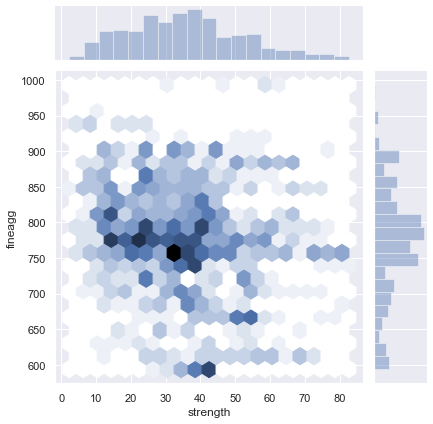

In [776]:
plt.figure(figsize=(12,6))
sns.jointplot(df_concrete["strength"], df_concrete["fineagg"], kind="hex")

<Figure size 864x432 with 0 Axes>

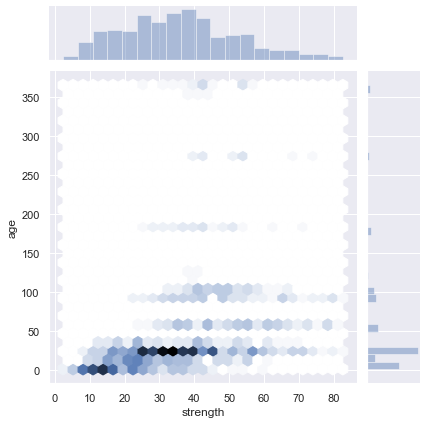

In [777]:
plt.figure(figsize=(12,6))
sns.jointplot(df_concrete["strength"], df_concrete["age"], kind="hex")

Text(0.5, 1, 'Correlation between variables')

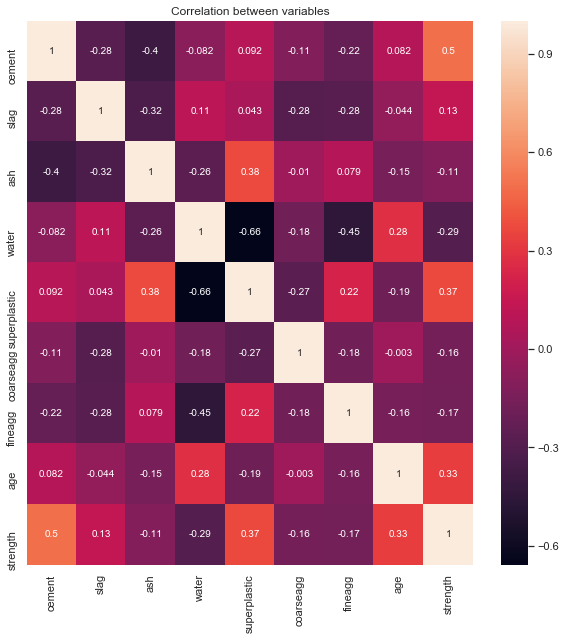

In [778]:
plt.figure(figsize = (10,10))
sns.heatmap(df_concrete.corr(method = 'pearson'), annot = True)
plt.title("Correlation between variables")

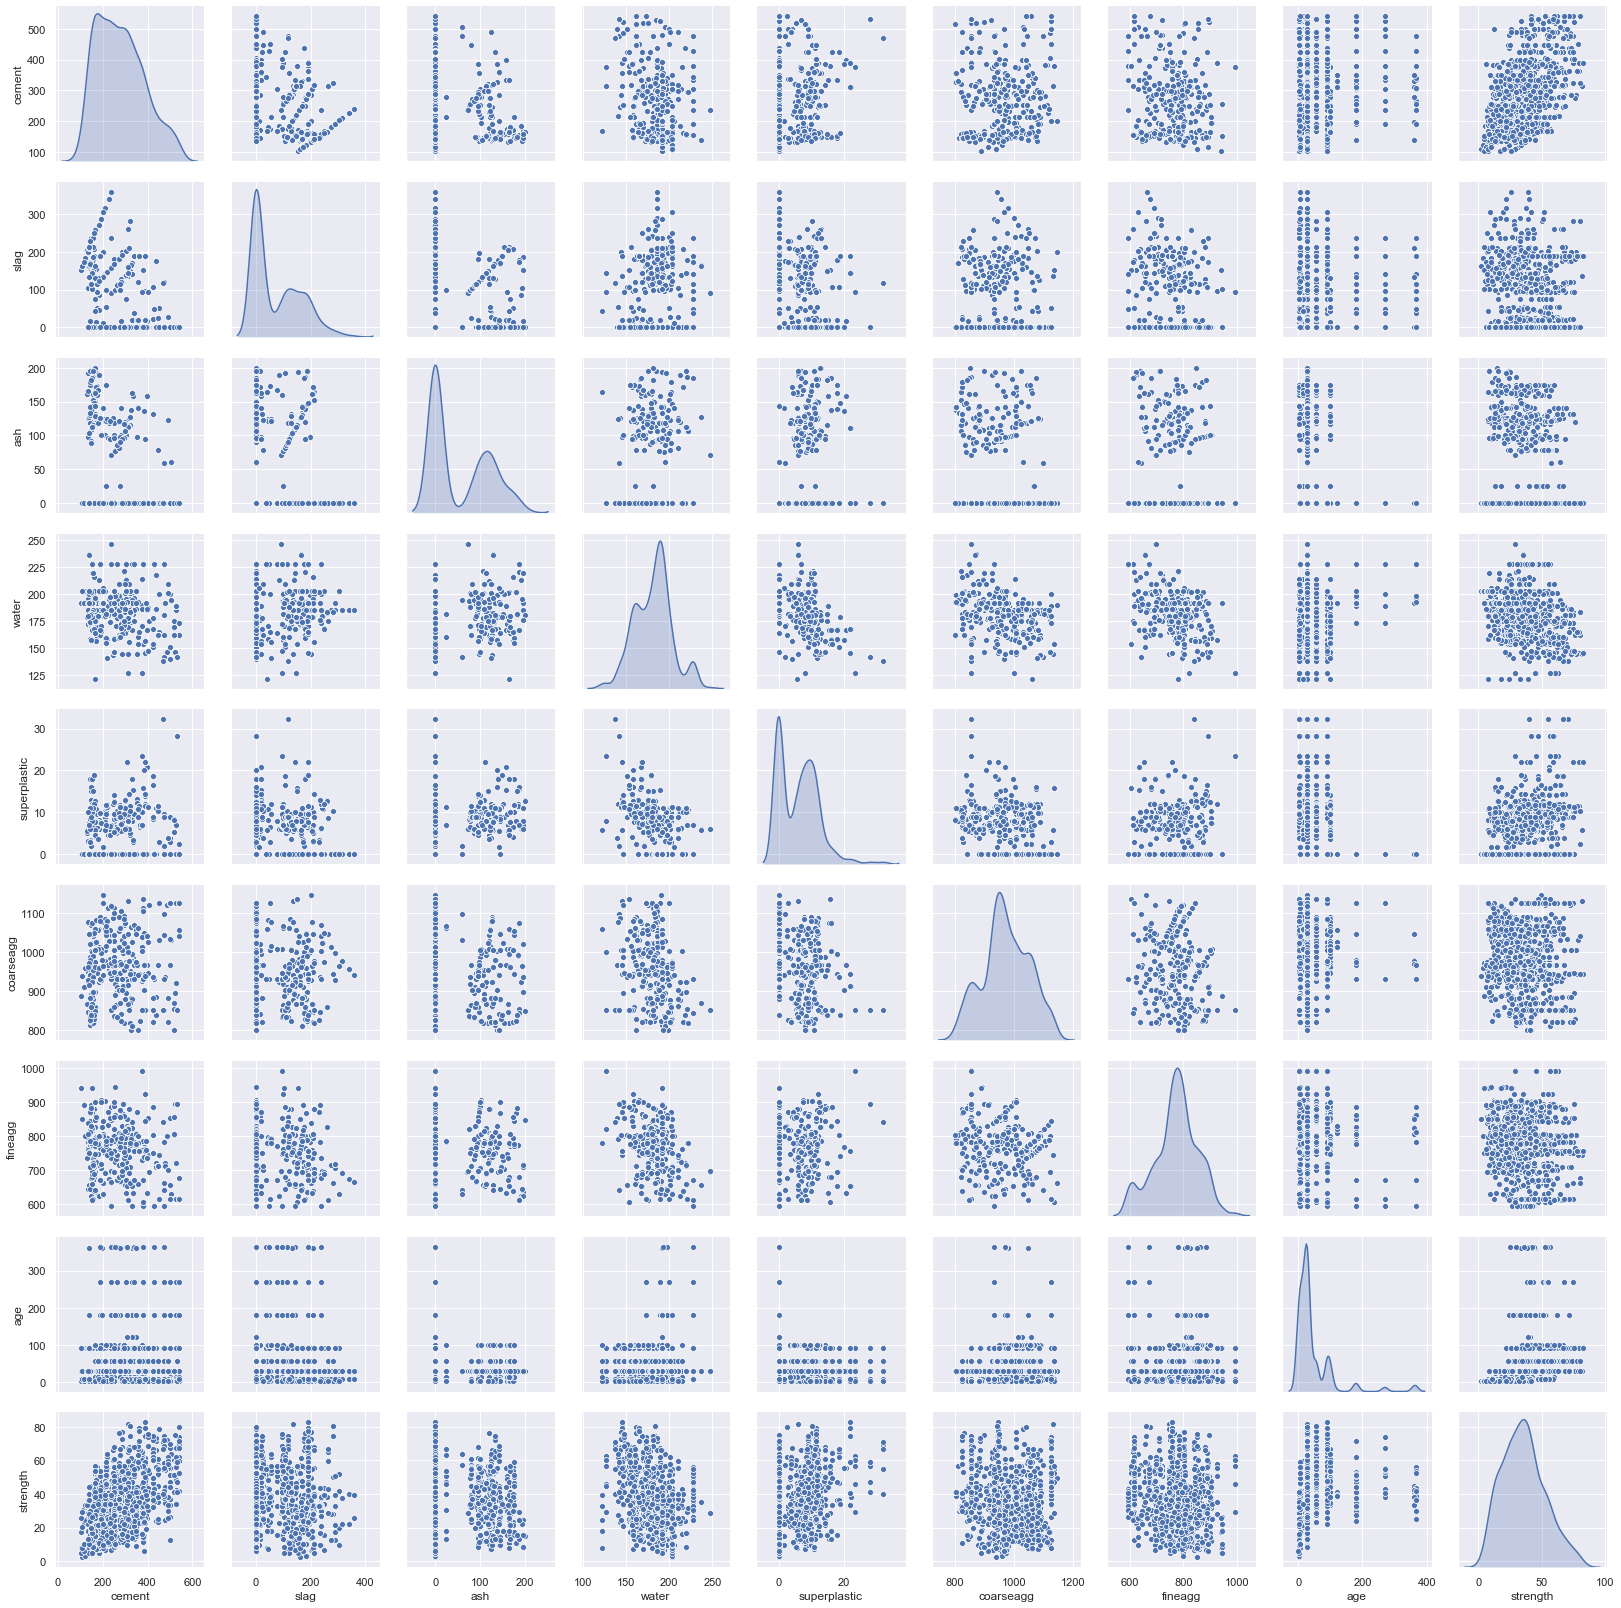

In [779]:
sns.pairplot(df_concrete, diag_kind = 'kde')

Observing that cement is well related with strength and the other attributes are mostly forming clouds. None of the predictors by themselves seem to have a strong relation with the target.

### Data problem solving strategies

There is no missing value or NULL values, hence skipping it and doing outlier treatment.

In [780]:
df_concrete.median()

cement          272.900
slag             22.000
ash               0.000
water           185.000
superplastic      6.400
coarseagg       968.000
fineagg         779.500
age              28.000
strength         34.445
dtype: float64

In [781]:
print('cement above: ', df_concrete['cement'].quantile(q = 0.75) + 1.5*(df_concrete['cement'].quantile(q = 0.75) - df_concrete['cement'].quantile(q = 0.25)), 'are outliers')

cement above:  586.4375 are outliers


In [782]:
print('Numerber of outliers: ', df_concrete[df_concrete['cement'] > 586.4375]['cement'].count())
print('Number of clients: ', len(df_concrete))
#Outliers in %
print('Outliers are:', round(df_concrete[df_concrete['cement'] > 586.4375]['cement'].count()*100/len(df_concrete),2), '%')

Numerber of outliers:  0
Number of clients:  1030
Outliers are: 0.0 %


Hence no outliers in cement column

In [783]:
print('slag above: ', df_concrete['slag'].quantile(q = 0.75) + 	1.5*(df_concrete['slag'].quantile(q = 0.75) - df_concrete['slag'].quantile(q = 0.25)), 'are outliers')

slag above:  357.375 are outliers


In [784]:
print('Numerber of outliers: ', df_concrete[df_concrete['slag'] > 357.375]['slag'].count())
print('Number of clients: ', len(df_concrete))
#Outliers in %
print('Outliers are:', round(df_concrete[df_concrete['slag'] > 357.375]['slag'].count()*100/len(df_concrete),2), '%')

Numerber of outliers:  2
Number of clients:  1030
Outliers are: 0.19 %


In [785]:
# Setting slag outliers value to median value

df_concrete[df_concrete['slag'] > 357.375] = 22.000
df_concrete[df_concrete['slag'] > 357.375]

Empty DataFrame
Columns: [cement, slag, ash, water, superplastic, coarseagg, fineagg, age, strength]
Index: []

In [786]:
print('ash above: ', df_concrete['ash'].quantile(q = 0.75) + 	1.5*(df_concrete['ash'].quantile(q = 0.75) - df_concrete['ash'].quantile(q = 0.25)), 'are outliers')

ash above:  295.75 are outliers


In [787]:
print('Numerber of outliers: ', df_concrete[df_concrete['ash'] > 295.75]['ash'].count())
print('Number of clients: ', len(df_concrete))
#Outliers in %
print('Outliers are:', round(df_concrete[df_concrete['ash'] > 295.75]['ash'].count()*100/len(df_concrete),2), '%')

Numerber of outliers:  0
Number of clients:  1030
Outliers are: 0.0 %


Hence no outliers in ash column

In [788]:
print('water above: ', df_concrete['water'].quantile(q = 0.75) +  1.5*(df_concrete['water'].quantile(q = 0.75) - df_concrete['water'].quantile(q = 0.25)), 'are outliers')

water above:  232.64999999999998 are outliers


In [789]:
print('Numerber of outliers: ', df_concrete[df_concrete['water'] > 232.64999999999998]['water'].count())
print('Number of clients: ', len(df_concrete))
#Outliers in %
print('Outliers are:', round(df_concrete[df_concrete['water'] > 232.64999999999998]['water'].count()*100/len(df_concrete),2), '%')

Numerber of outliers:  4
Number of clients:  1030
Outliers are: 0.39 %


In [790]:
# Setting water outliers value to median value

df_concrete[df_concrete['water'] > 232.64999999999998] = 185.000
df_concrete[df_concrete['water'] > 232.64999999999998]

Empty DataFrame
Columns: [cement, slag, ash, water, superplastic, coarseagg, fineagg, age, strength]
Index: []

In [791]:
print('superplastic above: ', df_concrete['superplastic'].quantile(q = 0.75) +  1.5*(df_concrete['superplastic'].quantile(q = 0.75) - df_concrete['superplastic'].quantile(q = 0.25)), 'are outliers')

superplastic above:  25.75 are outliers


In [792]:
print('Numerber of outliers: ', df_concrete[df_concrete['superplastic'] > 25.75]['superplastic'].count())
print('Number of clients: ', len(df_concrete))
#Outliers in %
print('Outliers are:', round(df_concrete[df_concrete['superplastic'] > 25.75]['superplastic'].count()*100/len(df_concrete),2), '%')

Numerber of outliers:  14
Number of clients:  1030
Outliers are: 1.36 %


In [793]:
# Setting superplastic outliers value to median value

df_concrete[df_concrete['superplastic'] > 25.75] = 6.400
df_concrete[df_concrete['superplastic'] > 25.75]

Empty DataFrame
Columns: [cement, slag, ash, water, superplastic, coarseagg, fineagg, age, strength]
Index: []

In [794]:
print('coarseagg above: ', df_concrete['coarseagg'].quantile(q = 0.75) +  1.5*(df_concrete['coarseagg'].quantile(q = 0.75) - df_concrete['coarseagg'].quantile(q = 0.25)), 'are outliers')

coarseagg above:  1175.5000000000002 are outliers


In [795]:
print('Numerber of outliers: ', df_concrete[df_concrete['coarseagg'] > 1175.5000000000002]['coarseagg'].count())
print('Number of clients: ', len(df_concrete))
#Outliers in %
print('Outliers are:', round(df_concrete[df_concrete['coarseagg'] > 1175.5000000000002]['coarseagg'].count()*100/len(df_concrete),2), '%')

Numerber of outliers:  0
Number of clients:  1030
Outliers are: 0.0 %


Hence no outliers in coarseagg column

In [796]:
print('fineagg above: ', df_concrete['fineagg'].quantile(q = 0.75) +  1.5*(df_concrete['fineagg'].quantile(q = 0.75) - df_concrete['fineagg'].quantile(q = 0.25)), 'are outliers')

fineagg above:  968.8249999999998 are outliers


In [797]:
print('Numerber of outliers: ', df_concrete[df_concrete['fineagg'] > 968.8249999999998]['fineagg'].count())
print('Number of clients: ', len(df_concrete))
#Outliers in %
print('Outliers are:', round(df_concrete[df_concrete['fineagg'] > 968.8249999999998]['fineagg'].count()*100/len(df_concrete),2), '%')

Numerber of outliers:  5
Number of clients:  1030
Outliers are: 0.49 %


In [798]:
# Setting fineagg outliers value to median value

df_concrete[df_concrete['fineagg'] > 968.8249999999998] = 779.500
df_concrete[df_concrete['fineagg'] > 968.8249999999998]

Empty DataFrame
Columns: [cement, slag, ash, water, superplastic, coarseagg, fineagg, age, strength]
Index: []

In [799]:
print('age above: ', df_concrete['age'].quantile(q = 0.75) +  1.5*(df_concrete['age'].quantile(q = 0.75) - df_concrete['age'].quantile(q = 0.25)), 'are outliers')

age above:  129.5 are outliers


In [800]:
print('Numerber of outliers: ', df_concrete[df_concrete['age'] > 129.5]['age'].count())
print('Number of clients: ', len(df_concrete))
#Outliers in %
print('Outliers are:', round(df_concrete[df_concrete['age'] > 129.5]['age'].count()*100/len(df_concrete),2), '%')

Numerber of outliers:  64
Number of clients:  1030
Outliers are: 6.21 %


In [801]:
# Setting age outliers value to median value

df_concrete[df_concrete['age'] > 129.5] = 28.000
df_concrete[df_concrete['age'] > 129.5]

Empty DataFrame
Columns: [cement, slag, ash, water, superplastic, coarseagg, fineagg, age, strength]
Index: []

In [802]:
print('strength above: ', df_concrete['strength'].quantile(q = 0.75) +  1.5*(df_concrete['strength'].quantile(q = 0.75) - df_concrete['strength'].quantile(q = 0.25)), 'are outliers')

strength above:  75.6575 are outliers


In [803]:
print('Numerber of outliers: ', df_concrete[df_concrete['strength'] > 75.6575]['strength'].count())
print('Number of clients: ', len(df_concrete))
#Outliers in %
print('Outliers are:', round(df_concrete[df_concrete['strength'] > 75.6575]['strength'].count()*100/len(df_concrete),2), '%')

Numerber of outliers:  16
Number of clients:  1030
Outliers are: 1.55 %


In [804]:
# Setting strength outliers value to median value

df_concrete[df_concrete['strength'] > 75.6575] = 34.445
df_concrete[df_concrete['strength'] > 75.6575]

Empty DataFrame
Columns: [cement, slag, ash, water, superplastic, coarseagg, fineagg, age, strength]
Index: []

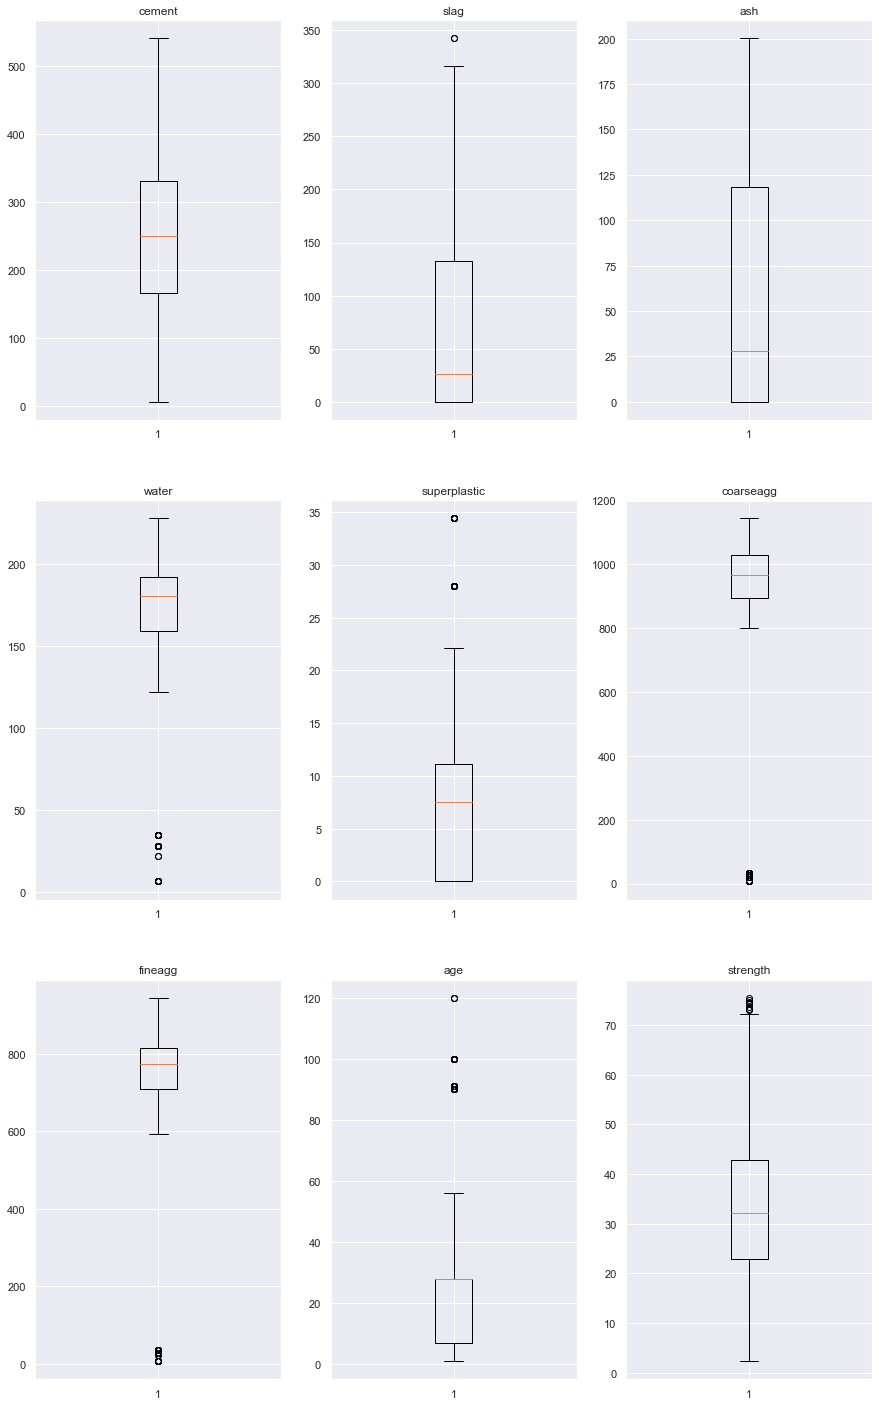

In [805]:
fig, axs = plt.subplots(3, 3, figsize = (15,25))

axs[0, 0].boxplot(df_concrete.cement)
axs[0, 0].set_title('cement')

axs[0, 1].boxplot(df_concrete.slag)
axs[0, 1].set_title('slag')

axs[0, 2].boxplot(df_concrete.ash)
axs[0, 2].set_title('ash')

axs[1, 0].boxplot(df_concrete.water)
axs[1, 0].set_title('water')

axs[1, 1].boxplot(df_concrete['superplastic'])
axs[1, 1].set_title('superplastic')

axs[1, 2].boxplot(df_concrete['coarseagg'])
axs[1, 2].set_title('coarseagg')

axs[2, 0].boxplot(df_concrete.fineagg)
axs[2, 0].set_title('fineagg')

axs[2, 1].boxplot(df_concrete.age)
axs[2, 1].set_title('age')

axs[2, 2].boxplot(df_concrete.strength)
axs[2, 2].set_title('strength')

plt.show()

Very few outliers are left aftre replacing the initial outliers with Median value. I am ignoring the new outliers which are created by the outlier treatment.

Since this is a regression problem with all numerical columns involved of different metrics, it will be better if we scale them."

### Preparing for Data Modelling

In [806]:
# Drop strength variable

data_new = df_concrete.drop(['strength'], axis =1)
data_new.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg   age
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5  28.0
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2  14.0
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2  28.0
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0  28.0
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7  28.0

In [807]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null float64
dtypes: float64(8)
memory usage: 64.5 KB


In [808]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data_new)
df_scaled = pd.DataFrame(scaled, columns = data_new.columns)
df_scaled.head()

cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0 -0.906309  1.738878 -0.898731  0.768782     -0.994278   0.296276  0.181488   
1 -0.678244 -0.312492  1.092936 -0.160998      0.348597   0.677487  0.389054   
2 -0.008093 -0.822315  0.634676  0.437599     -0.310407   0.244166  0.671901   
3  0.124119  0.554930 -0.898731  1.272755     -0.994278   0.157082 -0.160104   
4 -0.794755  1.393358 -0.898731  0.558964      0.137219   0.560676 -0.043919   

        age  
0 -0.125304  
1 -0.639685  
2 -0.125304  
3 -0.125304  
4 -0.125304

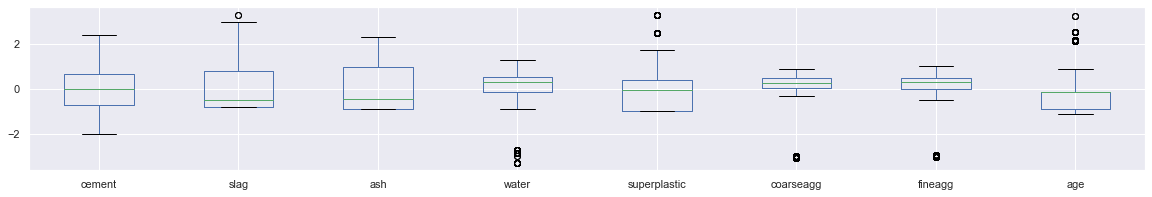

In [809]:
df_scaled.boxplot(figsize=(20,3))

### Splitting data into training and test sets (70:30)

In [810]:
df_concrete['strength'] = df_concrete['strength'].astype(float) 

In [811]:
X = df_scaled
y = df_concrete['strength']

In [812]:
X.shape

(1030, 8)

In [813]:
y.shape

(1030,)

In [814]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

### Initiating model comparison dataframe

In [1077]:
col_names =  ['Model Type', 'Training Score', 'Test Score']
model_comparison  = pd.DataFrame(columns = col_names)
model_comparison

Empty DataFrame
Columns: [Model Type, Training Score, Test Score]
Index: []

## 1. Linear Regression

### 1.1 Normal Linear Regression

In [1078]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1079]:
linear_model.score(X_train, y_train)

0.7713762733782499

In [1080]:
linear_model.score(X_test, y_test)

0.7476402889258102

In [1081]:
model_comparison.loc[len(model_comparison)] = 'Linear Regression', round(linear_model.score(X_train, y_train)*100,2), round(linear_model.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0  Linear Regression           77.14       74.76

In [1082]:
# Finding out the importance of features

feature_importances = linear_model.coef_.ravel()
feature_names = X.columns
print(feature_names)
print(feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[13.75806003  6.78736161  3.2675176  -7.24856322  3.70932351  0.61139742
  0.95303758  7.90069597]


Text(0.5, 1.0, 'FEATURE IMPORTANCES')

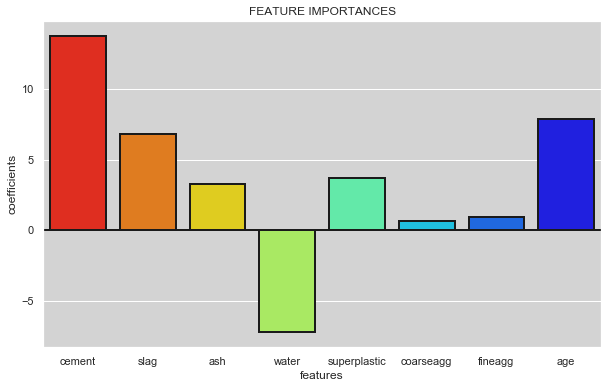

In [1083]:
# Plotting the feature importance metric for better visualisation

plt.figure(figsize=(10,6))
coef = pd.DataFrame(linear_model.coef_.ravel())
coef["feat"] = X_train.columns
ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
        linewidth=2,edgecolor="k"*coef["feat"].nunique())
ax1.set_facecolor("lightgrey")
ax1.axhline(0,color="k",linewidth=2)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title('FEATURE IMPORTANCES')

In [1084]:
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rms = sqrt(mse)
r2Score = r2_score(y_test, y_pred)
print("The Root Mean Sq Error is {} and R^2 error is {}".format(rms,r2Score))

The Root Mean Sq Error is 7.961960357299568 and R^2 error is 0.7476402889258102


In [1085]:
b1 = linear_model.coef_
b0 = linear_model.intercept_
print("b1 is: {} and b0 is: {}".format(b1, b0))

b1 is: [13.75806003  6.78736161  3.2675176  -7.24856322  3.70932351  0.61139742
  0.95303758  7.90069597] and b0 is: 33.693746159998575


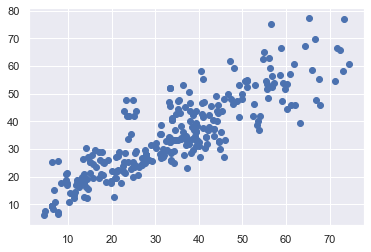

In [1086]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = linear_model.predict(X_test)
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test, y_pred)

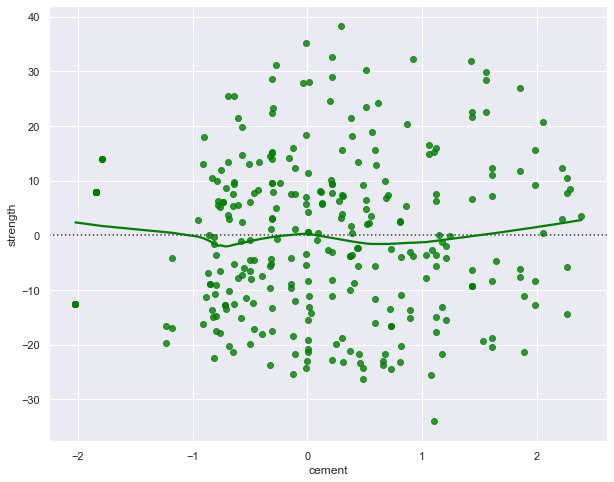

In [1087]:
# Is OLS a good model ? Should we building a simple linear model ? Check the residuals for few predictor.

fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['cement'], y= y_test, color='green', lowess=True )

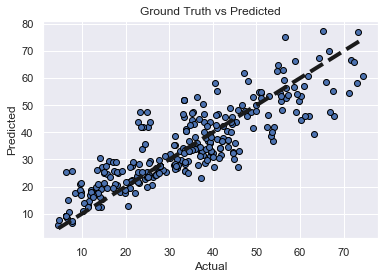

In [1088]:
y_pred = linear_model.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [1089]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

cement      slag       ash     water  superplastic  coarseagg  \
299 -0.432825  0.777222 -0.898731  0.532223     -0.994278   0.319359   
667  0.024960 -0.822315 -0.898731  0.655645     -0.994278   0.282986   
803  0.180309  0.447408  0.411956  0.896318      0.124785   0.059156   
375 -0.906309  1.738878 -0.898731  0.768782     -0.994278   0.296276   
199 -1.842537 -0.484044 -0.450085 -2.841316      2.487251  -3.004517   

      fineagg       age  strength  
299  0.516553 -1.043842      9.13  
667  0.679734 -1.043842      9.31  
803 -0.117894 -0.125304     37.17  
375  0.181488 -1.043842      4.83  
199 -2.953759 -0.125304     28.00

In [1090]:
lm1 = smf.ols(formula= 'strength ~ cement + slag + ash + superplastic + fineagg + age', data = data_train).fit()
lm1.params
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     341.2
Date:                Sun, 20 Oct 2019   Prob (F-statistic):          7.05e-206
Time:                        15:49:28   Log-Likelihood:                -2510.3
No. Observations:                 721   AIC:                             5035.
Df Residuals:                     714   BIC:                             5067.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       33.6355      0.295    114.022   

### 1.2 Linear Regression by dropping columns

In [1091]:
X_drop = df_scaled.drop(['water','coarseagg'], axis =1)
y_drop = df_concrete['strength']

In [1092]:
X_train, X_test, y_train, y_test = train_test_split(X_drop, y_drop, test_size = 0.3, random_state = 11)

In [1093]:
linear_model_drop = LinearRegression()
linear_model_drop.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1094]:
print(linear_model_drop.score(X_train, y_train))
print(linear_model_drop.score(X_test, y_test))

0.7414154475936845
0.7121204989040102


In [1095]:
model_comparison.loc[len(model_comparison)] = 'Linear Regression (Column Drop)', round(linear_model_drop.score(X_train, y_train)*100,2), round(linear_model_drop.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                Linear Regression           77.14       74.76
1  Linear Regression (Column Drop)           74.14       71.21

Score drops when manually dropping 2 least correlated columns.

### 1.3 Linear Regression with PCA

In [1096]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [1097]:
# Performing PCA with all components first

pca = PCA(n_components = 8)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [1098]:
print(pca.explained_variance_)

[3.94197747 1.41824207 1.0119806  0.95649618 0.50081846 0.21068226
 0.09554206 0.07914638]


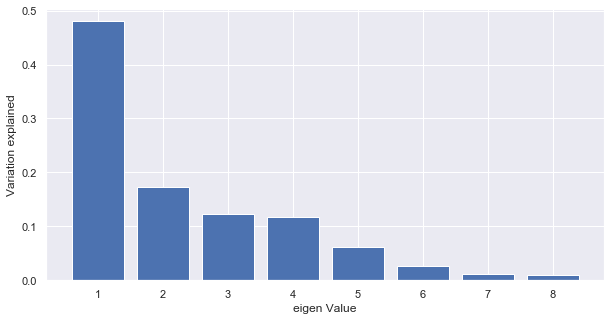

In [1099]:
# Finding out the importance of features

plt.figure(figsize = (10,5))
plt.bar(list(range(1,9)),pca.explained_variance_ratio_,tick_label=range(1,9), align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

Usig elbow method to see the number of features that can explain more than 95% of the output

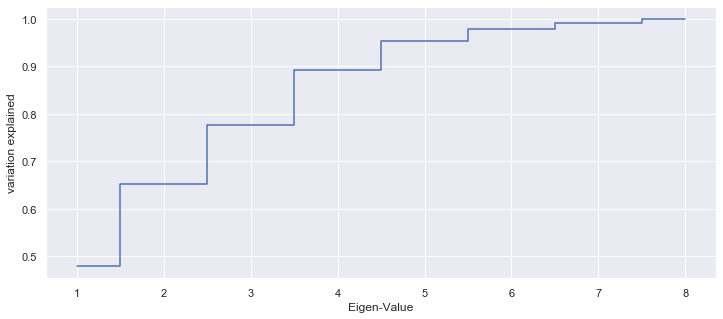

In [1100]:
plt.figure(figsize = (12,5))
plt.xticks(np.arange(0,9))
plt.step(list(range(1,9)),np.cumsum(pca.explained_variance_ratio_), where = 'mid')
plt.ylabel('variation explained')
plt.xlabel('Eigen-Value')
plt.show()

From the elbow method we found out 6 features are enough. PCA seemed not that much effective though in this case.

#### Running Linear Regression with 6 important features

In [1101]:
pca6 = PCA(n_components = 6)
pca6.fit(X)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [1102]:
Xpca6 = pca6.fit_transform(X)

In [1103]:
X_train, X_test, y_train, y_test = train_test_split(Xpca6,y, test_size = 0.3, random_state = 11)

In [1104]:
linear_model_pca6 = LinearRegression()
linear_model_pca6.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1105]:
linear_model_pca6.score(X_train, y_train)

0.7367975640381448

In [1106]:
linear_model_pca6.score(X_test, y_test)

0.704772466292447

In [1107]:
model_comparison.loc[len(model_comparison)] = 'Linear Regression with PCA', round(linear_model_pca6.score(X_train, y_train)*100,2), round(linear_model_pca6.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                Linear Regression           77.14       74.76
1  Linear Regression (Column Drop)           74.14       71.21
2       Linear Regression with PCA           73.68       70.48

PCA did not elevate the score, instead the score is dropped by neglecting only 2 columns. PCA is performing fine.

In [1108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

## 2. Ridge Regression

### 2.1 Normal Ridge

In [1109]:
ridge = Ridge(alpha = 0.3,random_state = 11)
ridge.fit(X_train, y_train)
print ("Ridge model:", (ridge.coef_))   

Ridge model: [13.73901127  6.77349045  3.25490491 -7.2165653   3.72347786  0.61221474
  0.94776096  7.89639061]


In [1110]:
ridge.score(X_train, y_train)

0.7713752069702212

In [1111]:
ridge.score(X_test, y_test)

0.7476893687828039

Feature Importance

In [1112]:
feature_importances = ridge.coef_.ravel()
feature_names = X.columns
print(feature_names)
print(feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[13.73901127  6.77349045  3.25490491 -7.2165653   3.72347786  0.61221474
  0.94776096  7.89639061]


Text(0.5, 1.0, 'FEATURE IMPORTANCES')

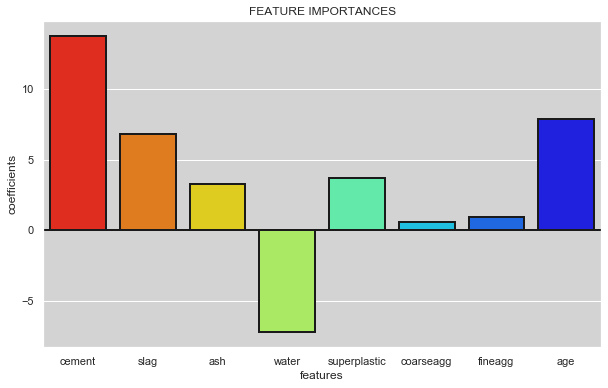

In [1113]:
plt.figure(figsize=(10,6))
coef = pd.DataFrame(ridge.coef_.ravel())
coef["feat"] = X_train.columns
ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
        linewidth=2,edgecolor="k"*coef["feat"].nunique())
ax1.set_facecolor("lightgrey")
ax1.axhline(0,color="k",linewidth=2)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title('FEATURE IMPORTANCES')

In [1114]:
model_comparison.loc[len(model_comparison)] = 'Ridge Regression', round(ridge.score(X_train, y_train)*100,2), round(ridge.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                Linear Regression           77.14       74.76
1  Linear Regression (Column Drop)           74.14       71.21
2       Linear Regression with PCA           73.68       70.48
3                 Ridge Regression           77.14       74.77

Using Ridge does not improve much score either.

### 2.2 Ridge after dropping columns

In [1115]:
X_train, X_test, y_train, y_test = train_test_split(X_drop, y_drop, test_size = 0.3, random_state = 11)

In [1116]:
ridge = Ridge(alpha = 0.3,random_state = 11)
ridge.fit(X_train, y_train)
print ("Ridge model:", (ridge.coef_))   
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

Ridge model: [12.31832373  5.27011067  1.93966392  7.10761922 -1.19191496  7.7754765 ]
0.7414150295165461
0.7121972982477986


In [1117]:
model_comparison.loc[len(model_comparison)] = 'Ridge Regression (Column Drop)', round(ridge.score(X_train, y_train)*100,2), round(ridge.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                Linear Regression           77.14       74.76
1  Linear Regression (Column Drop)           74.14       71.21
2       Linear Regression with PCA           73.68       70.48
3                 Ridge Regression           77.14       74.77
4   Ridge Regression (Column Drop)           74.14       71.22

Dropping columns for Ridge did not improve score as per dropping 2 features

### 2.3 Ridge with PCA

In [1118]:
X_train, X_test, y_train, y_test = train_test_split(Xpca6, y, test_size = 0.3, random_state = 11)

In [1119]:
ridge = Ridge(alpha = 0.3,random_state = 11)
ridge.fit(X_train, y_train)
print ("Ridge model:", (ridge.coef_))   
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

Ridge model: [-1.04272426 -0.71337581  3.66443576  7.83865695 14.28762564  2.9138256 ]
0.7367971750863449
0.704856539324155


In [1120]:
model_comparison.loc[len(model_comparison)] = 'Ridge Regression with PCA', round(ridge.score(X_train, y_train)*100,2), round(ridge.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                Linear Regression           77.14       74.76
1  Linear Regression (Column Drop)           74.14       71.21
2       Linear Regression with PCA           73.68       70.48
3                 Ridge Regression           77.14       74.77
4   Ridge Regression (Column Drop)           74.14       71.22
5        Ridge Regression with PCA           73.68       70.49

## 3. Lasso Regression

### 3.1 Normal Lasso

In [1121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [1122]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [13.41932087  6.40281118  3.01229034 -6.08266014  3.86016062  0.1015534
  0.6931968   7.79488136]


In [1123]:
lasso.score(X_train, y_train)

0.7701762067572413

In [1124]:
lasso.score(X_test, y_test)

0.7463004883346617

Feature Importance

In [1125]:
feature_importances = lasso.coef_.ravel()
feature_names = X.columns
print(feature_names)
print(feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[13.41932087  6.40281118  3.01229034 -6.08266014  3.86016062  0.1015534
  0.6931968   7.79488136]


Text(0.5, 1.0, 'FEATURE IMPORTANCES')

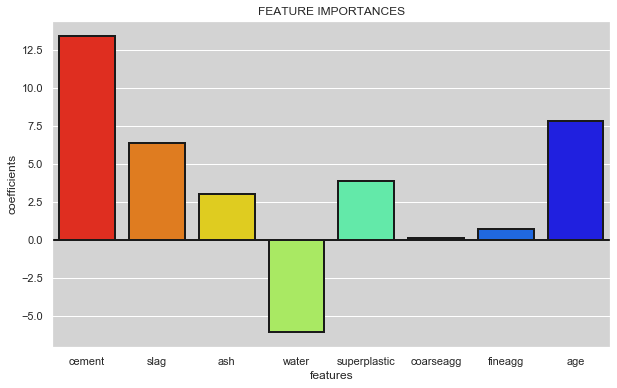

In [1126]:
plt.figure(figsize=(10,6))
coef = pd.DataFrame(lasso.coef_.ravel())
coef["feat"] = X_train.columns
ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
        linewidth=2,edgecolor="k"*coef["feat"].nunique())
ax1.set_facecolor("lightgrey")
ax1.axhline(0,color="k",linewidth=2)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title('FEATURE IMPORTANCES')

In [1127]:
model_comparison.loc[len(model_comparison)] = 'Lasso Regression', round(lasso.score(X_train, y_train)*100,2), round(lasso.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                Linear Regression           77.14       74.76
1  Linear Regression (Column Drop)           74.14       71.21
2       Linear Regression with PCA           73.68       70.48
3                 Ridge Regression           77.14       74.77
4   Ridge Regression (Column Drop)           74.14       71.22
5        Ridge Regression with PCA           73.68       70.49
6                 Lasso Regression           77.02       74.63

### 3.2 Lasso by dropping columns

In [1128]:
X_drop = df_scaled.drop(['water','coarseagg','fineagg'], axis =1)
y_drop = df_concrete['strength']

In [1129]:
X_train, X_test, y_train, y_test = train_test_split(X_drop, y_drop, test_size = 0.3, random_state = 11)

In [1130]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [11.62197775  4.85928859  1.31489841  7.59474171  7.59628658]


In [1131]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.738919494728404
0.7086997064349831


In [1132]:
model_comparison.loc[len(model_comparison)] = 'Lasso Regression (Column Drop)', round(lasso.score(X_train, y_train)*100,2), round(lasso.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                Linear Regression           77.14       74.76
1  Linear Regression (Column Drop)           74.14       71.21
2       Linear Regression with PCA           73.68       70.48
3                 Ridge Regression           77.14       74.77
4   Ridge Regression (Column Drop)           74.14       71.22
5        Ridge Regression with PCA           73.68       70.49
6                 Lasso Regression           77.02       74.63
7   Lasso Regression (Column Drop)           73.89       70.87

Atleast Lasso Peformed better by dropping 3 columns than Ridge

### 3.3 Lasso with PCA

In [1133]:
X_train, X_test, y_train, y_test = train_test_split(Xpca6, y, test_size = 0.3, random_state = 11)

In [1134]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [-1.01580062 -0.64559473  3.56794035  7.72541444 14.09357585  2.43805712]


In [1135]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7363806043475778
0.7043026875777079


In [1136]:
model_comparison.loc[len(model_comparison)] = 'Lasso Regression with PCA', round(lasso.score(X_train, y_train)*100,2), round(lasso.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                Linear Regression           77.14       74.76
1  Linear Regression (Column Drop)           74.14       71.21
2       Linear Regression with PCA           73.68       70.48
3                 Ridge Regression           77.14       74.77
4   Ridge Regression (Column Drop)           74.14       71.22
5        Ridge Regression with PCA           73.68       70.49
6                 Lasso Regression           77.02       74.63
7   Lasso Regression (Column Drop)           73.89       70.87
8        Lasso Regression with PCA           73.64       70.43

## 4. Polynomial Features : Linear, Ridge and Lasso Regression

### 4.1 Polynomial Degree 2

In [1137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [1138]:
poly = PolynomialFeatures(degree = 2, interaction_only = True)

In [1139]:
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=11)

#### 4.1.1 Linear Regression

In [1140]:
linear_model_poly2 = LinearRegression()
linear_model_poly2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1141]:
print(linear_model_poly2.score(X_train, y_train))
print(linear_model_poly2.score(X_test, y_test))

0.8222489148318389
0.744160201911356


In [1142]:
model_comparison.loc[len(model_comparison)] = 'Linear Regression (Polynomial = 2)', round(linear_model_poly2.score(X_train, y_train)*100,2), round(linear_model_poly2.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                   Linear Regression           77.14       74.76
1     Linear Regression (Column Drop)           74.14       71.21
2          Linear Regression with PCA           73.68       70.48
3                    Ridge Regression           77.14       74.77
4      Ridge Regression (Column Drop)           74.14       71.22
5           Ridge Regression with PCA           73.68       70.49
6                    Lasso Regression           77.02       74.63
7      Lasso Regression (Column Drop)           73.89       70.87
8           Lasso Regression with PCA           73.64       70.43
9  Linear Regression (Polynomial = 2)           82.22       74.42

#### 4.1.2 Ridge Regression

In [1143]:
ridge_poly2 = Ridge(alpha = 0.3)
ridge_poly2.fit(X_train, y_train)
print ("Ridge model:", (ridge_poly2.coef_)) 

Ridge model: [ 0.00000000e+00  1.38282041e+01  5.09759896e+00  6.97947540e-03
 -9.13816204e-02  4.26431420e+00  2.39715256e+00 -8.85554582e-01
  3.45246623e+00  2.16062645e+00  3.30969878e+00 -6.68661171e+00
 -3.57644564e+00  3.77723395e+00  4.51882440e+00  2.96807519e+00
  2.62842915e+00  1.67200023e+00 -3.11766607e-01  2.23264958e+00
  6.50162479e+00  3.43202552e+00 -2.40350055e+00 -2.66219502e+00
  4.88963458e+00  8.32495820e+00  2.30737479e+00  1.44659340e+00
 -1.23302759e+01 -2.24846160e+00  1.79047589e+00 -1.53811838e+00
 -2.51002161e+00 -1.62141601e-01  5.42338170e+00  6.07510043e+00
  3.98756864e+00]


In [1144]:
print(ridge_poly2.score(X_train, y_train))
print(ridge_poly2.score(X_test, y_test))

0.8221802497651296
0.7459986022426339


In [1145]:
model_comparison.loc[len(model_comparison)] = 'Ridge Regression (Polynomial = 2)', round(ridge_poly2.score(X_train, y_train)*100,2), round(ridge_poly2.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                    Linear Regression           77.14       74.76
1      Linear Regression (Column Drop)           74.14       71.21
2           Linear Regression with PCA           73.68       70.48
3                     Ridge Regression           77.14       74.77
4       Ridge Regression (Column Drop)           74.14       71.22
5            Ridge Regression with PCA           73.68       70.49
6                     Lasso Regression           77.02       74.63
7       Lasso Regression (Column Drop)           73.89       70.87
8            Lasso Regression with PCA           73.64       70.43
9   Linear Regression (Polynomial = 2)           82.22       74.42
10   Ridge Regression (Polynomial = 2)           82.22       74.60

#### 4.1.3 Lasso Regression

In [1146]:
lasso_poly2 = Lasso(alpha=0.01)
lasso_poly2.fit(X_train,y_train)
print ("Lasso model:", (lasso_poly2.coef_))

Lasso model: [ 0.00000000e+00  1.39120674e+01  5.21906969e+00  3.22372705e-03
 -1.81821264e+00  3.79535712e+00  2.18821205e+00 -8.90496124e-01
  5.85135032e+00  1.98304459e+00  3.12607925e+00 -5.93778375e+00
 -3.29587723e+00  2.37923489e+00  3.98075718e+00  1.90674669e+00
  2.46238019e+00  2.28760479e+00 -2.19527397e-02  1.09510952e+00
  5.94178149e+00  2.59547636e+00 -1.51021410e+00 -2.33502364e+00
  4.06655333e+00  8.20871392e+00  1.60034523e+00  8.43886980e-01
 -9.62780689e+00 -5.11344485e-01  3.55902269e-01 -9.17119023e-02
 -1.94502839e+00 -1.61584526e-02  3.47683836e+00  3.54977098e+00
  1.49297178e+00]


D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3347.4132209374948, tolerance: 17.256885806449375
  positive)


In [1147]:
print(lasso_poly2.score(X_train, y_train))
print(lasso_poly2.score(X_test, y_test))

0.8210184591227562
0.7498362360861317


In [1148]:
model_comparison.loc[len(model_comparison)] = 'Lasso Regression (Polynomial = 2)', round(lasso_poly2.score(X_train, y_train)*100,2), round(lasso_poly2.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                    Linear Regression           77.14       74.76
1      Linear Regression (Column Drop)           74.14       71.21
2           Linear Regression with PCA           73.68       70.48
3                     Ridge Regression           77.14       74.77
4       Ridge Regression (Column Drop)           74.14       71.22
5            Ridge Regression with PCA           73.68       70.49
6                     Lasso Regression           77.02       74.63
7       Lasso Regression (Column Drop)           73.89       70.87
8            Lasso Regression with PCA           73.64       70.43
9   Linear Regression (Polynomial = 2)           82.22       74.42
10   Ridge Regression (Polynomial = 2)           82.22       74.60
11   Lasso Regression (Polynomial = 2)           82.10       74.98

### 4.2 Polynomial Degree = 3

In [1149]:
poly = PolynomialFeatures(degree = 3, interaction_only = True)

In [1150]:
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=11)

#### 4.2.1 Linear Regression

In [1151]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1152]:
print(linear_model.score(X_train, y_train))
print(linear_model.score(X_test, y_test))

0.8555870938153618
0.6997542289569396


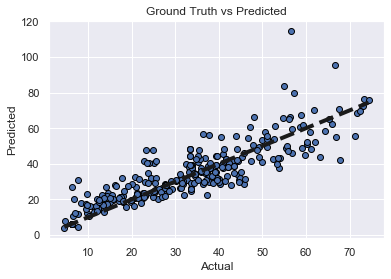

In [1153]:
y_pred = linear_model.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [1154]:
model_comparison.loc[len(model_comparison)] = 'Linear Regression (Polynomial = 3)', round(linear_model.score(X_train, y_train)*100,2), round(linear_model.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                    Linear Regression           77.14       74.76
1      Linear Regression (Column Drop)           74.14       71.21
2           Linear Regression with PCA           73.68       70.48
3                     Ridge Regression           77.14       74.77
4       Ridge Regression (Column Drop)           74.14       71.22
5            Ridge Regression with PCA           73.68       70.49
6                     Lasso Regression           77.02       74.63
7       Lasso Regression (Column Drop)           73.89       70.87
8            Lasso Regression with PCA           73.64       70.43
9   Linear Regression (Polynomial = 2)           82.22       74.42
10   Ridge Regression (Polynomial = 2)           82.22       74.60
11   Lasso Regression (Polynomial = 2)           82.10       74.98
12  Linear Regression (Polynomial = 3)           85.56       69.98

Polynomial with Degree = 3 Linear Regression seems to be overfitting on test data.

#### 4.2.2 Ridge Regression

In [1155]:
ridge = Ridge(alpha = 0.3)
ridge.fit(X_train, y_train)
print ("Ridge model:", (ridge.coef_)) 

Ridge model: [ 0.00000000e+00  1.27081569e+01  5.85440573e+00  2.24325100e+00
  8.38703225e-01 -7.74250912e-01  3.61764150e+00 -6.32222810e-01
  5.05747196e+00 -5.55090502e-03  2.48232154e+00 -4.80029107e+00
 -1.72667344e+00  7.71677408e-01  5.10936306e+00  2.62405808e+00
 -9.30254157e-01  6.79689948e-01  2.15390023e+00  8.27213888e-01
  1.12046873e+00  3.58042613e+00 -4.15830202e+00  1.53166066e+00
 -7.48907213e-01  4.74281423e+00  4.01493250e+00  8.37414722e-01
 -1.93145636e+01 -3.33516782e+00 -2.85158766e+00  1.29149070e+00
 -4.48515637e-01 -2.26918067e+00  2.08792590e+00  7.32270624e+00
  3.53072688e+00 -1.23897491e+00  3.70028125e+00  2.53923851e-01
 -5.78237758e+00  1.33412045e+00 -5.47191096e-01  2.03068919e-01
 -1.78571589e+00 -1.62876158e+00 -1.60595430e+00  5.94701332e-01
  3.80177797e+00 -4.68408631e+00  2.30054338e+00  2.54597970e-01
  1.41205009e+00  3.02549070e+00  2.83044751e-01  7.73015707e-01
 -4.43313620e+00  1.38884102e+00  3.15107298e+00 -2.61809819e+00
  1.92145251

In [1156]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8545381824318321
0.7164154325340742


In [1157]:
model_comparison.loc[len(model_comparison)] = 'Ridge Regression (Polynomial = 3)', round(ridge.score(X_train, y_train)*100,2), round(ridge.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                    Linear Regression           77.14       74.76
1      Linear Regression (Column Drop)           74.14       71.21
2           Linear Regression with PCA           73.68       70.48
3                     Ridge Regression           77.14       74.77
4       Ridge Regression (Column Drop)           74.14       71.22
5            Ridge Regression with PCA           73.68       70.49
6                     Lasso Regression           77.02       74.63
7       Lasso Regression (Column Drop)           73.89       70.87
8            Lasso Regression with PCA           73.64       70.43
9   Linear Regression (Polynomial = 2)           82.22       74.42
10   Ridge Regression (Polynomial = 2)           82.22       74.60
11   Lasso Regression (Polynomial = 2)           82.10       74.98
12  Linear Regression (Polynomial = 3)           85.56       69.98
13   Ridge Regression (Polynomial = 3)           85.45       71.64

#### 4.2.3 Lasso Regression

In [1158]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.00000000e+00  1.28383719e+01  5.08089105e+00  0.00000000e+00
 -2.97989462e+00  1.11712346e+00  0.00000000e+00 -2.32507812e+00
  7.02694137e+00  6.65401117e-01  2.23340855e+00 -4.43471193e+00
 -1.23713671e+00 -0.00000000e+00  3.84795062e+00  1.77393689e+00
  5.58513900e-02  2.13791110e+00  1.01060036e+00  2.89358910e-01
  2.55483289e+00  2.98973872e+00 -4.71485119e-01 -5.87862756e-02
  2.71754769e+00  7.46996932e+00  3.69347972e+00 -1.14085880e+00
 -9.93358594e+00 -2.82487786e-01 -1.77794327e+00  5.71331931e-01
  4.36085967e-04  0.00000000e+00  4.27269091e+00  3.34699465e+00
  8.45416985e-01 -1.84583034e+00  2.30086967e+00 -2.04230075e-01
 -6.00652865e+00  1.36596020e+00 -2.51523543e-01  5.42496783e-01
 -2.45662116e-01 -1.78495634e+00  1.84120246e-01  6.65606639e-01
  8.08293864e-01 -4.53029515e-01  0.00000000e+00 -0.00000000e+00
 -2.09261299e-01 -6.22069962e-01 -5.55699903e-01  3.84228273e-01
 -1.46763595e+00  7.00458696e-01  1.86311298e+00 -1.55223492e+00
  0.00000000

D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9334.404312960414, tolerance: 17.256885806449375
  positive)


In [1159]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.8467227220620646
0.7323346789331499


In [1160]:
model_comparison.loc[len(model_comparison)] = 'Lasso Regression (Polynomial = 3)', round(lasso.score(X_train, y_train)*100,2), round(lasso.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                    Linear Regression           77.14       74.76
1      Linear Regression (Column Drop)           74.14       71.21
2           Linear Regression with PCA           73.68       70.48
3                     Ridge Regression           77.14       74.77
4       Ridge Regression (Column Drop)           74.14       71.22
5            Ridge Regression with PCA           73.68       70.49
6                     Lasso Regression           77.02       74.63
7       Lasso Regression (Column Drop)           73.89       70.87
8            Lasso Regression with PCA           73.64       70.43
9   Linear Regression (Polynomial = 2)           82.22       74.42
10   Ridge Regression (Polynomial = 2)           82.22       74.60
11   Lasso Regression (Polynomial = 2)           82.10       74.98
12  Linear Regression (Polynomial = 3)           85.56       69.98
13   Ridge Regression (Polynomial = 3)           85.45       71.64
14   Lasso Regression (Polynomial = 3)           84.67       73.23

## 5. Decision Tree Regressor

### 5.1 Normal Decision Tree Regressor

In [1161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

In [1162]:
dt_model = DecisionTreeRegressor(criterion='mse', random_state = 11)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=11, splitter='best')

In [1163]:
print(dt_model.score(X_train, y_train))
print(dt_model.score(X_test, y_test))

0.9939692586387108
0.8370847235428653


In [1164]:
y_pred = dt_model.predict(X_test)

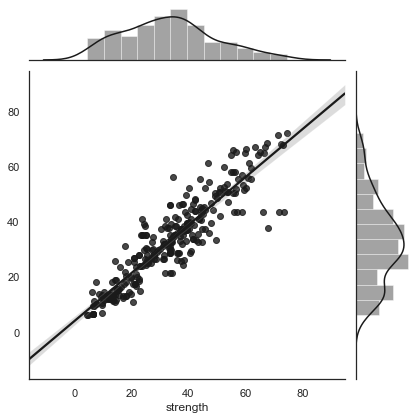

In [1165]:
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [1166]:
model_comparison.loc[len(model_comparison)] = 'Decision Tree Regressor', round(dt_model.score(X_train, y_train)*100,2), round(dt_model.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                    Linear Regression           77.14       74.76
1      Linear Regression (Column Drop)           74.14       71.21
2           Linear Regression with PCA           73.68       70.48
3                     Ridge Regression           77.14       74.77
4       Ridge Regression (Column Drop)           74.14       71.22
5            Ridge Regression with PCA           73.68       70.49
6                     Lasso Regression           77.02       74.63
7       Lasso Regression (Column Drop)           73.89       70.87
8            Lasso Regression with PCA           73.64       70.43
9   Linear Regression (Polynomial = 2)           82.22       74.42
10   Ridge Regression (Polynomial = 2)           82.22       74.60
11   Lasso Regression (Polynomial = 2)           82.10       74.98
12  Linear Regression (Polynomial = 3)           85.56       69.98
13   Ridge Regression (Polynomial = 3)           85.45       71.64
14   Lasso Regression (Polynomial = 3)           84.67       73.23
15             Decision Tree Regressor           99.40       83.71

Feature Importance

In [1167]:
feature_importances = dt_model.feature_importances_
feature_names = X.columns
print(feature_names)
print(feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[0.40065224 0.06551581 0.01631837 0.08719335 0.06814433 0.04265347
 0.03668418 0.28283826]


Text(0.5, 1.0, 'FEATURE IMPORTANCES')

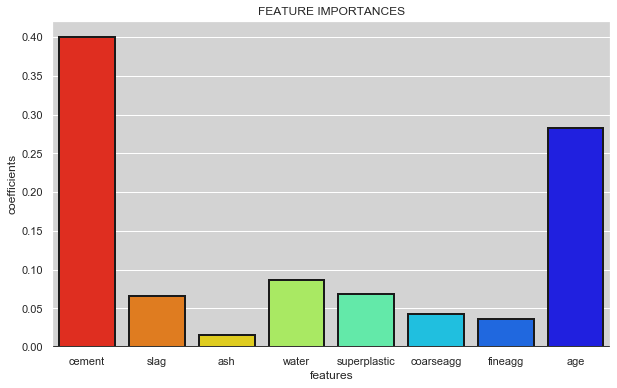

In [1168]:
plt.figure(figsize = (10,6))
coef = pd.DataFrame(dt_model.feature_importances_)
coef["feat"] = X_train.columns
ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
    linewidth=2,edgecolor="k"*coef["feat"].nunique())
ax1.set_facecolor("lightgrey")
ax1.axhline(0,color="k",linewidth=2)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title('FEATURE IMPORTANCES')

### 5.2 Decision Tree Regressor with Hyper Parameter Tuning and dropping columns

In [1169]:
X_drop = df_scaled.drop(['ash','fineagg'], axis =1)
y_drop = df_concrete['strength']

Dropping the least correlated columns as per above graph

In [1170]:
X_train, X_test, y_train, y_test = train_test_split(X_drop, y_drop, test_size = 0.3, random_state = 11)

In [1171]:
dt_model = DecisionTreeRegressor(criterion='mse', max_depth = 9, min_samples_split = 5, random_state = 11)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=11, splitter='best')

In [1172]:
print(dt_model.score(X_train, y_train))
print(dt_model.score(X_test, y_test))

0.9559514155216701
0.7645002515017457


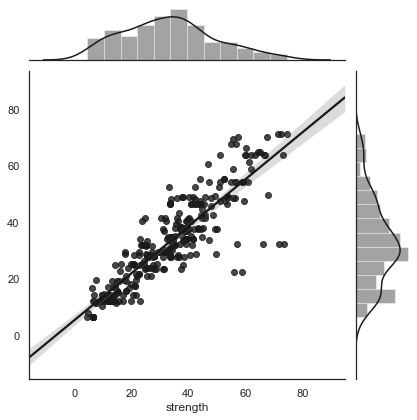

In [1173]:
y_pred = dt_model.predict(X_test)
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [1174]:
model_comparison.loc[len(model_comparison)] = 'Decision Tree Regressor (Tuned)', round(dt_model.score(X_train, y_train)*100,2), round(dt_model.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                    Linear Regression           77.14       74.76
1      Linear Regression (Column Drop)           74.14       71.21
2           Linear Regression with PCA           73.68       70.48
3                     Ridge Regression           77.14       74.77
4       Ridge Regression (Column Drop)           74.14       71.22
5            Ridge Regression with PCA           73.68       70.49
6                     Lasso Regression           77.02       74.63
7       Lasso Regression (Column Drop)           73.89       70.87
8            Lasso Regression with PCA           73.64       70.43
9   Linear Regression (Polynomial = 2)           82.22       74.42
10   Ridge Regression (Polynomial = 2)           82.22       74.60
11   Lasso Regression (Polynomial = 2)           82.10       74.98
12  Linear Regression (Polynomial = 3)           85.56       69.98
13   Ridge Regression (Polynomial = 3)           85.45       71.64
14   Lasso Regression (Polynomial = 3)           84.67       73.23
15             Decision Tree Regressor           99.40       83.71
16     Decision Tree Regressor (Tuned)           95.60       76.45

### 5.3 Decision Tree Regressor with PCA

In [1175]:
X_train, X_test, y_train, y_test = train_test_split(Xpca6, y, test_size = 0.3, random_state = 11)

In [1176]:
parameters = { 'criterion': ['mse'],
 'max_depth': [3,4,5,6,7,8,9,10],
 'min_samples_split': [3,4,5,6,7,8,9,10]}
dtr_cv = GridSearchCV(DecisionTreeRegressor(), param_grid = parameters, cv = 10)

In [1177]:
dtr_cv.fit(X_train, y_train)

D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch

In [1178]:
print(dtr_cv.score(X_train, y_train))
print(dtr_cv.score(X_test, y_test))

0.9511527519989067
0.6779109774633831


In [1179]:
dtr_cv.best_params_

{'criterion': 'mse', 'max_depth': 10, 'min_samples_split': 9}

In [1180]:
model_comparison.loc[len(model_comparison)] = 'Decision Tree Regressor with PCA', round(dtr_cv.score(X_train, y_train)*100,2), round(dtr_cv.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                    Linear Regression           77.14       74.76
1      Linear Regression (Column Drop)           74.14       71.21
2           Linear Regression with PCA           73.68       70.48
3                     Ridge Regression           77.14       74.77
4       Ridge Regression (Column Drop)           74.14       71.22
5            Ridge Regression with PCA           73.68       70.49
6                     Lasso Regression           77.02       74.63
7       Lasso Regression (Column Drop)           73.89       70.87
8            Lasso Regression with PCA           73.64       70.43
9   Linear Regression (Polynomial = 2)           82.22       74.42
10   Ridge Regression (Polynomial = 2)           82.22       74.60
11   Lasso Regression (Polynomial = 2)           82.10       74.98
12  Linear Regression (Polynomial = 3)           85.56       69.98
13   Ridge Regression (Polynomial = 3)           85.45       71.64
14   Lasso Regression (Polynomial = 3)           84.67       73.23
15             Decision Tree Regressor           99.40       83.71
16     Decision Tree Regressor (Tuned)           95.60       76.45
17    Decision Tree Regressor with PCA           95.12       67.79

### Model Performance at 95% confidence level

In [1181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

In [1182]:
dt_model = DecisionTreeRegressor(criterion='mse', max_depth = 9, min_samples_split = 5, random_state = 11)

In [1183]:
seed = 11
results = cross_val_score(dt_model, X_test, y_test, cv=20)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[ 0.8204195  -0.09439157  0.7022567   0.80964193  0.87166981  0.8259509
  0.68293065  0.78271814  0.62835386  0.46138085  0.82057191  0.84762676
  0.52603806  0.45837561  0.9022889   0.61721624  0.6703428   0.87353925
  0.734766    0.88540341]
Accuracy: 69.135% (22.472%)


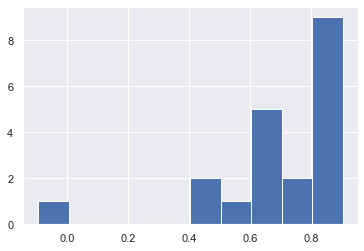

95.0 confidence interval 16.8% and 89.4%


In [1184]:
# plot scores
plt.hist(results)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

## 6. K Nearest Regressor

### 6.1 Normal KN regressor

In [1185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [1186]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [1187]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.8853907097849114
0.7754976180383287


In [1188]:
model_comparison.loc[len(model_comparison)] = 'KNN Regressor', round(knn.score(X_train, y_train)*100,2), round(knn.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                    Linear Regression           77.14       74.76
1      Linear Regression (Column Drop)           74.14       71.21
2           Linear Regression with PCA           73.68       70.48
3                     Ridge Regression           77.14       74.77
4       Ridge Regression (Column Drop)           74.14       71.22
5            Ridge Regression with PCA           73.68       70.49
6                     Lasso Regression           77.02       74.63
7       Lasso Regression (Column Drop)           73.89       70.87
8            Lasso Regression with PCA           73.64       70.43
9   Linear Regression (Polynomial = 2)           82.22       74.42
10   Ridge Regression (Polynomial = 2)           82.22       74.60
11   Lasso Regression (Polynomial = 2)           82.10       74.98
12  Linear Regression (Polynomial = 3)           85.56       69.98
13   Ridge Regression (Polynomial = 3)           85.45       71.64
14   Lasso Regression (Polynomial = 3)           84.67       73.23
15             Decision Tree Regressor           99.40       83.71
16     Decision Tree Regressor (Tuned)           95.60       76.45
17    Decision Tree Regressor with PCA           95.12       67.79
18                       KNN Regressor           88.54       77.55

### 6.2 K Nearest Regressor with Hyper Parameter Tuning

In [1189]:
parameters = { 'n_neighbors': [2,3,4,6],
 'weights': ['uniform', 'distance']}
knn_cv = GridSearchCV(KNeighborsRegressor(), param_grid = parameters, cv = 10)

In [1190]:
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 6],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [1191]:
knn_cv.best_params_

{'n_neighbors': 6, 'weights': 'distance'}

In [1192]:
print(knn_cv.score(X_train, y_train))
print(knn_cv.score(X_test, y_test))

0.9939692586387108
0.8025309265573977


In [1193]:
model_comparison.loc[len(model_comparison)] = 'KNN Regressor Tuned', round(knn.score(X_train, y_train)*100,2), round(knn.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                    Linear Regression           77.14       74.76
1      Linear Regression (Column Drop)           74.14       71.21
2           Linear Regression with PCA           73.68       70.48
3                     Ridge Regression           77.14       74.77
4       Ridge Regression (Column Drop)           74.14       71.22
5            Ridge Regression with PCA           73.68       70.49
6                     Lasso Regression           77.02       74.63
7       Lasso Regression (Column Drop)           73.89       70.87
8            Lasso Regression with PCA           73.64       70.43
9   Linear Regression (Polynomial = 2)           82.22       74.42
10   Ridge Regression (Polynomial = 2)           82.22       74.60
11   Lasso Regression (Polynomial = 2)           82.10       74.98
12  Linear Regression (Polynomial = 3)           85.56       69.98
13   Ridge Regression (Polynomial = 3)           85.45       71.64
14   Lasso Regression (Polynomial = 3)           84.67       73.23
15             Decision Tree Regressor           99.40       83.71
16     Decision Tree Regressor (Tuned)           95.60       76.45
17    Decision Tree Regressor with PCA           95.12       67.79
18                       KNN Regressor           88.54       77.55
19                 KNN Regressor Tuned           88.54       77.55

In [1194]:
y_pred = knn_cv.predict(X_test)

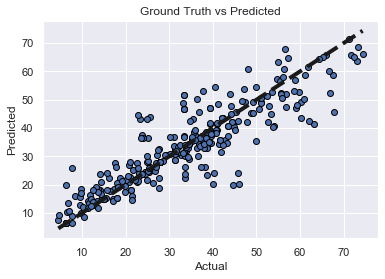

In [1195]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### 6.3 K Nearest Regressor with PCA

In [1196]:
X_train, X_test, y_train, y_test = train_test_split(Xpca6, y, test_size = 0.3, random_state = 11)

In [1197]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [1198]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.8873733872148803
0.7709312506995007


In [1199]:
model_comparison.loc[len(model_comparison)] = 'KNN Regressor with PCA', round(knn.score(X_train, y_train)*100,2), round(knn.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                    Linear Regression           77.14       74.76
1      Linear Regression (Column Drop)           74.14       71.21
2           Linear Regression with PCA           73.68       70.48
3                     Ridge Regression           77.14       74.77
4       Ridge Regression (Column Drop)           74.14       71.22
5            Ridge Regression with PCA           73.68       70.49
6                     Lasso Regression           77.02       74.63
7       Lasso Regression (Column Drop)           73.89       70.87
8            Lasso Regression with PCA           73.64       70.43
9   Linear Regression (Polynomial = 2)           82.22       74.42
10   Ridge Regression (Polynomial = 2)           82.22       74.60
11   Lasso Regression (Polynomial = 2)           82.10       74.98
12  Linear Regression (Polynomial = 3)           85.56       69.98
13   Ridge Regression (Polynomial = 3)           85.45       71.64
14   Lasso Regression (Polynomial = 3)           84.67       73.23
15             Decision Tree Regressor           99.40       83.71
16     Decision Tree Regressor (Tuned)           95.60       76.45
17    Decision Tree Regressor with PCA           95.12       67.79
18                       KNN Regressor           88.54       77.55
19                 KNN Regressor Tuned           88.54       77.55
20              KNN Regressor with PCA           88.74       77.09

### Model Performance at 95% confidence level

In [1200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [1201]:
knn = KNeighborsRegressor(n_neighbors= 6, weights= 'distance')

In [1202]:
results = cross_val_score(knn, X_test, y_test, cv=20)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.88083462 0.45624522 0.78536724 0.67005738 0.84592398 0.80922178
 0.83316954 0.79647948 0.73814922 0.75428944 0.90707439 0.82133543
 0.75432005 0.42970871 0.93264555 0.6678886  0.56781863 0.86500241
 0.74876597 0.85917985]
Accuracy: 75.617% (13.473%)


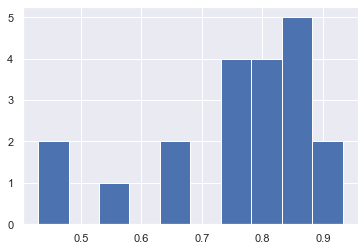

95.0 confidence interval 44.2% and 92.0%


In [1203]:
# plot scores
plt.hist(results)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

## 7. Support Vector Regressor

### 7.1 Normal Support Vector Regression

In [1204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [1205]:
svr = SVR()
svr.fit(X_train, y_train)

D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [1206]:
print(svr.score(X_train, y_train))
print(svr.score(X_test, y_test))

0.7603270086562925
0.754283176550649


In [1207]:
model_comparison.loc[len(model_comparison)] = 'SVR', round(svr.score(X_train, y_train)*100,2), round(svr.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                    Linear Regression           77.14       74.76
1      Linear Regression (Column Drop)           74.14       71.21
2           Linear Regression with PCA           73.68       70.48
3                     Ridge Regression           77.14       74.77
4       Ridge Regression (Column Drop)           74.14       71.22
5            Ridge Regression with PCA           73.68       70.49
6                     Lasso Regression           77.02       74.63
7       Lasso Regression (Column Drop)           73.89       70.87
8            Lasso Regression with PCA           73.64       70.43
9   Linear Regression (Polynomial = 2)           82.22       74.42
10   Ridge Regression (Polynomial = 2)           82.22       74.60
11   Lasso Regression (Polynomial = 2)           82.10       74.98
12  Linear Regression (Polynomial = 3)           85.56       69.98
13   Ridge Regression (Polynomial = 3)           85.45       71.64
14   Lasso Regression (Polynomial = 3)           84.67       73.23
15             Decision Tree Regressor           99.40       83.71
16     Decision Tree Regressor (Tuned)           95.60       76.45
17    Decision Tree Regressor with PCA           95.12       67.79
18                       KNN Regressor           88.54       77.55
19                 KNN Regressor Tuned           88.54       77.55
20              KNN Regressor with PCA           88.74       77.09
21                                 SVR           76.03       75.43

### 7.2 Support Vector Ressor with Hyper Parameter Tuning

In [1208]:
parameters = {'kernel': ['rbf', 'poly', 'linear'], 'C': list(range(1,100,5)), 'gamma':['auto']}
svrgs = GridSearchCV(SVR(), param_grid = parameters, cv = 10)

In [1209]:
svrgs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61,
                               66, 71, 76, 81, 86, 91, 96],
                         'gamma': ['auto'],
                         'kernel': ['rbf', 'poly', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [1210]:
print(svrgs.score(X_train, y_train))
print(svrgs.score(X_test, y_test))

0.9200704618713677
0.8740310945796119


In [1211]:
model_comparison.loc[len(model_comparison)] = 'SVR Tuned', round(svrgs.score(X_train, y_train)*100,2), round(svrgs.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                    Linear Regression           77.14       74.76
1      Linear Regression (Column Drop)           74.14       71.21
2           Linear Regression with PCA           73.68       70.48
3                     Ridge Regression           77.14       74.77
4       Ridge Regression (Column Drop)           74.14       71.22
5            Ridge Regression with PCA           73.68       70.49
6                     Lasso Regression           77.02       74.63
7       Lasso Regression (Column Drop)           73.89       70.87
8            Lasso Regression with PCA           73.64       70.43
9   Linear Regression (Polynomial = 2)           82.22       74.42
10   Ridge Regression (Polynomial = 2)           82.22       74.60
11   Lasso Regression (Polynomial = 2)           82.10       74.98
12  Linear Regression (Polynomial = 3)           85.56       69.98
13   Ridge Regression (Polynomial = 3)           85.45       71.64
14   Lasso Regression (Polynomial = 3)           84.67       73.23
15             Decision Tree Regressor           99.40       83.71
16     Decision Tree Regressor (Tuned)           95.60       76.45
17    Decision Tree Regressor with PCA           95.12       67.79
18                       KNN Regressor           88.54       77.55
19                 KNN Regressor Tuned           88.54       77.55
20              KNN Regressor with PCA           88.74       77.09
21                                 SVR           76.03       75.43
22                           SVR Tuned           92.01       87.40

In [1212]:
svrgs.best_params_

{'C': 96, 'gamma': 'auto', 'kernel': 'rbf'}

In [1213]:
y_pred = svrgs.predict(X_test)

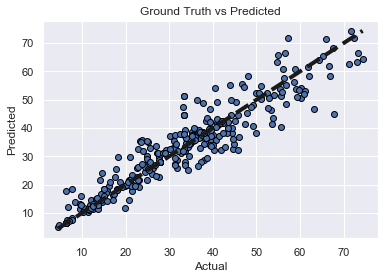

In [1214]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### 7.3 Supprt Vector Regressor with PCA

In [1215]:
X_train, X_test, y_train, y_test = train_test_split(Xpca6, y, test_size = 0.3, random_state = 11)

In [1216]:
parameters = {'kernel': ['rbf', 'poly', 'linear'], 'C': list(range(1,100,5)), 'gamma':['auto']}
svrgs = GridSearchCV(SVR(), param_grid = parameters, cv = 10)

In [1217]:
svrgs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61,
                               66, 71, 76, 81, 86, 91, 96],
                         'gamma': ['auto'],
                         'kernel': ['rbf', 'poly', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [1218]:
print(svrgs.score(X_train, y_train))
print(svrgs.score(X_test, y_test))

0.8731345900393931
0.8167067075422111


In [1219]:
svrgs.best_params_

{'C': 61, 'gamma': 'auto', 'kernel': 'rbf'}

In [1220]:
model_comparison.loc[len(model_comparison)] = 'SVR ith PCA', round(svrgs.score(X_train, y_train)*100,2), round(svrgs.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                    Linear Regression           77.14       74.76
1      Linear Regression (Column Drop)           74.14       71.21
2           Linear Regression with PCA           73.68       70.48
3                     Ridge Regression           77.14       74.77
4       Ridge Regression (Column Drop)           74.14       71.22
5            Ridge Regression with PCA           73.68       70.49
6                     Lasso Regression           77.02       74.63
7       Lasso Regression (Column Drop)           73.89       70.87
8            Lasso Regression with PCA           73.64       70.43
9   Linear Regression (Polynomial = 2)           82.22       74.42
10   Ridge Regression (Polynomial = 2)           82.22       74.60
11   Lasso Regression (Polynomial = 2)           82.10       74.98
12  Linear Regression (Polynomial = 3)           85.56       69.98
13   Ridge Regression (Polynomial = 3)           85.45       71.64
14   Lasso Regression (Polynomial = 3)           84.67       73.23
15             Decision Tree Regressor           99.40       83.71
16     Decision Tree Regressor (Tuned)           95.60       76.45
17    Decision Tree Regressor with PCA           95.12       67.79
18                       KNN Regressor           88.54       77.55
19                 KNN Regressor Tuned           88.54       77.55
20              KNN Regressor with PCA           88.74       77.09
21                                 SVR           76.03       75.43
22                           SVR Tuned           92.01       87.40
23                         SVR ith PCA           87.31       81.67

### Model Performance at 95% confidence level

In [1221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [1222]:
svrbp = SVR(C = 61, gamma = 'auto', kernel= 'rbf')

In [1223]:
results = cross_val_score(svrbp, X_test, y_test, cv=20)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.90344419 0.75570939 0.84046005 0.80425958 0.89039119 0.94554185
 0.87686646 0.81521037 0.88606339 0.90580156 0.90289668 0.94239534
 0.76187996 0.7357361  0.93678258 0.76977941 0.72305047 0.9012426
 0.91006794 0.9572549 ]
Accuracy: 85.824% (7.405%)


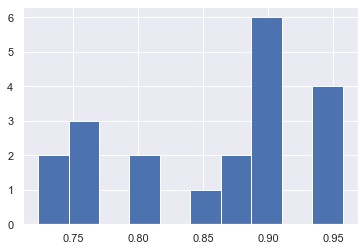

95.0 confidence interval 72.9% and 95.2%


In [1224]:
# plot scores
plt.hist(results)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

## 8. Random Forest Regressor

### 8.1 Normal Random Forest Regressor

In [1225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [1226]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [1227]:
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.9753667057181109
0.9035240442224534


In [1228]:
model_comparison.loc[len(model_comparison)] = 'Random Forest Regressor', round(rfr.score(X_train, y_train)*100,2), round(rfr.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                    Linear Regression           77.14       74.76
1      Linear Regression (Column Drop)           74.14       71.21
2           Linear Regression with PCA           73.68       70.48
3                     Ridge Regression           77.14       74.77
4       Ridge Regression (Column Drop)           74.14       71.22
5            Ridge Regression with PCA           73.68       70.49
6                     Lasso Regression           77.02       74.63
7       Lasso Regression (Column Drop)           73.89       70.87
8            Lasso Regression with PCA           73.64       70.43
9   Linear Regression (Polynomial = 2)           82.22       74.42
10   Ridge Regression (Polynomial = 2)           82.22       74.60
11   Lasso Regression (Polynomial = 2)           82.10       74.98
12  Linear Regression (Polynomial = 3)           85.56       69.98
13   Ridge Regression (Polynomial = 3)           85.45       71.64
14   Lasso Regression (Polynomial = 3)           84.67       73.23
15             Decision Tree Regressor           99.40       83.71
16     Decision Tree Regressor (Tuned)           95.60       76.45
17    Decision Tree Regressor with PCA           95.12       67.79
18                       KNN Regressor           88.54       77.55
19                 KNN Regressor Tuned           88.54       77.55
20              KNN Regressor with PCA           88.74       77.09
21                                 SVR           76.03       75.43
22                           SVR Tuned           92.01       87.40
23                         SVR ith PCA           87.31       81.67
24             Random Forest Regressor           97.54       90.35

Feature Importance

In [1229]:
feature_importances = rfr.feature_importances_
feature_names = X.columns
print(feature_names)
print(feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[0.35737525 0.06245172 0.01410944 0.12895392 0.03758446 0.03556581
 0.03560846 0.32835094]


Text(0.5, 1.0, 'FEATURE IMPORTANCES')

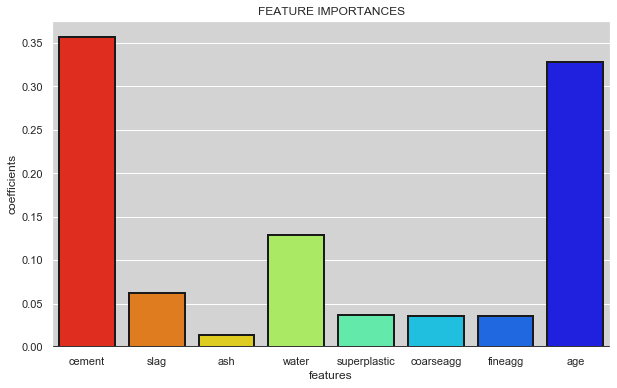

In [1230]:
plt.figure(figsize = (10,6))
coef = pd.DataFrame(rfr.feature_importances_)
coef["feat"] = X_train.columns
ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
    linewidth=2,edgecolor="k"*coef["feat"].nunique())
ax1.set_facecolor("lightgrey")
ax1.axhline(0,color="k",linewidth=2)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title('FEATURE IMPORTANCES')

### 8.2 Random Forest Regressor with Hyper Parameter Tuning

In [1231]:
parameters = { 'max_depth': [3,5,7,8,10,15],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 20, 30, 50, 70, 80, 100]}
rfrgs = GridSearchCV(RandomForestRegressor(), param_grid = parameters, cv = 10)

In [1232]:
rfrgs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 5, 7, 8, 10, 

In [1233]:
print(rfrgs.score(X_train, y_train))
print(rfrgs.score(X_test, y_test))

0.9803465967309989
0.9102257137706156


In [1234]:
rfrgs.best_params_

{'max_depth': 15,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 80}

In [1235]:
model_comparison.loc[len(model_comparison)] = 'Random Forest Regressor Tuned', round(rfrgs.score(X_train, y_train)*100,2), round(rfrgs.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                    Linear Regression           77.14       74.76
1      Linear Regression (Column Drop)           74.14       71.21
2           Linear Regression with PCA           73.68       70.48
3                     Ridge Regression           77.14       74.77
4       Ridge Regression (Column Drop)           74.14       71.22
5            Ridge Regression with PCA           73.68       70.49
6                     Lasso Regression           77.02       74.63
7       Lasso Regression (Column Drop)           73.89       70.87
8            Lasso Regression with PCA           73.64       70.43
9   Linear Regression (Polynomial = 2)           82.22       74.42
10   Ridge Regression (Polynomial = 2)           82.22       74.60
11   Lasso Regression (Polynomial = 2)           82.10       74.98
12  Linear Regression (Polynomial = 3)           85.56       69.98
13   Ridge Regression (Polynomial = 3)           85.45       71.64
14   Lasso Regression (Polynomial = 3)           84.67       73.23
15             Decision Tree Regressor           99.40       83.71
16     Decision Tree Regressor (Tuned)           95.60       76.45
17    Decision Tree Regressor with PCA           95.12       67.79
18                       KNN Regressor           88.54       77.55
19                 KNN Regressor Tuned           88.54       77.55
20              KNN Regressor with PCA           88.74       77.09
21                                 SVR           76.03       75.43
22                           SVR Tuned           92.01       87.40
23                         SVR ith PCA           87.31       81.67
24             Random Forest Regressor           97.54       90.35
25       Random Forest Regressor Tuned           98.03       91.02

### 8.3 Random Forest Regressor with PCA

In [1236]:
X_train, X_test, y_train, y_test = train_test_split(Xpca6, y, test_size = 0.3, random_state = 11)

In [1237]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [1238]:
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.9657820125726448
0.7928372595709215


In [1239]:
model_comparison.loc[len(model_comparison)] = 'Random Forest Regressor with PCA', round(rfr.score(X_train, y_train)*100,2), round(rfr.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                    Linear Regression           77.14       74.76
1      Linear Regression (Column Drop)           74.14       71.21
2           Linear Regression with PCA           73.68       70.48
3                     Ridge Regression           77.14       74.77
4       Ridge Regression (Column Drop)           74.14       71.22
5            Ridge Regression with PCA           73.68       70.49
6                     Lasso Regression           77.02       74.63
7       Lasso Regression (Column Drop)           73.89       70.87
8            Lasso Regression with PCA           73.64       70.43
9   Linear Regression (Polynomial = 2)           82.22       74.42
10   Ridge Regression (Polynomial = 2)           82.22       74.60
11   Lasso Regression (Polynomial = 2)           82.10       74.98
12  Linear Regression (Polynomial = 3)           85.56       69.98
13   Ridge Regression (Polynomial = 3)           85.45       71.64
14   Lasso Regression (Polynomial = 3)           84.67       73.23
15             Decision Tree Regressor           99.40       83.71
16     Decision Tree Regressor (Tuned)           95.60       76.45
17    Decision Tree Regressor with PCA           95.12       67.79
18                       KNN Regressor           88.54       77.55
19                 KNN Regressor Tuned           88.54       77.55
20              KNN Regressor with PCA           88.74       77.09
21                                 SVR           76.03       75.43
22                           SVR Tuned           92.01       87.40
23                         SVR ith PCA           87.31       81.67
24             Random Forest Regressor           97.54       90.35
25       Random Forest Regressor Tuned           98.03       91.02
26    Random Forest Regressor with PCA           96.58       79.28

### Model Performance at 95% confidence level

In [1240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [1241]:
rfr = RandomForestRegressor(max_depth=15,max_features='log2',min_samples_leaf= 1,min_samples_split= 2,n_estimators= 70, random_state=11)

In [1242]:
results = cross_val_score(rfr, X_test, y_test, cv=20)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.87290451 0.51288295 0.89428065 0.72515697 0.89565324 0.83104998
 0.86445639 0.79694313 0.88091666 0.83944856 0.92772886 0.77078703
 0.81330102 0.71546817 0.9339366  0.78854355 0.6198547  0.95731141
 0.83848793 0.91976337]
Accuracy: 81.994% (10.776%)


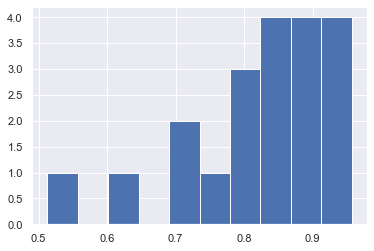

95.0 confidence interval 56.4% and 94.6%


In [1243]:
# plot scores
plt.hist(results)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

## 9. Bagging Regressor

### 9.1 Normal Bagging Regressor

In [1244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [1245]:
bagging = BaggingRegressor(random_state = 11)
bagging.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=11, verbose=0,
                 warm_start=False)

In [1246]:
print(bagging.score(X_train, y_train))
print(bagging.score(X_test, y_test))

0.9754198745862674
0.8893063608552443


In [1247]:
model_comparison.loc[len(model_comparison)] = 'Bagging Regressor', round(bagging.score(X_train, y_train)*100,2), round(bagging.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                    Linear Regression           77.14       74.76
1      Linear Regression (Column Drop)           74.14       71.21
2           Linear Regression with PCA           73.68       70.48
3                     Ridge Regression           77.14       74.77
4       Ridge Regression (Column Drop)           74.14       71.22
5            Ridge Regression with PCA           73.68       70.49
6                     Lasso Regression           77.02       74.63
7       Lasso Regression (Column Drop)           73.89       70.87
8            Lasso Regression with PCA           73.64       70.43
9   Linear Regression (Polynomial = 2)           82.22       74.42
10   Ridge Regression (Polynomial = 2)           82.22       74.60
11   Lasso Regression (Polynomial = 2)           82.10       74.98
12  Linear Regression (Polynomial = 3)           85.56       69.98
13   Ridge Regression (Polynomial = 3)           85.45       71.64
14   Lasso Regression (Polynomial = 3)           84.67       73.23
15             Decision Tree Regressor           99.40       83.71
16     Decision Tree Regressor (Tuned)           95.60       76.45
17    Decision Tree Regressor with PCA           95.12       67.79
18                       KNN Regressor           88.54       77.55
19                 KNN Regressor Tuned           88.54       77.55
20              KNN Regressor with PCA           88.74       77.09
21                                 SVR           76.03       75.43
22                           SVR Tuned           92.01       87.40
23                         SVR ith PCA           87.31       81.67
24             Random Forest Regressor           97.54       90.35
25       Random Forest Regressor Tuned           98.03       91.02
26    Random Forest Regressor with PCA           96.58       79.28
27                   Bagging Regressor           97.54       88.93

### 9.2 Bagging Regressor with Hyperparameter Tuning

In [1248]:
parameters ={'n_estimators': [10, 20, 30, 50, 70, 80, 100],
            'max_samples': [0.1, 0.2, 0.5, 1.0],
            'bootstrap': [True, False],
            'bootstrap_features': [True, False]}

In [1249]:
bagginggs = GridSearchCV(BaggingRegressor(), param_grid = parameters, cv = 10)
bagginggs.fit(X_train, y_train)

D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_samples': [0.1, 0.2, 0.5, 1.0],
                         'n_estimators': [10, 20, 30, 50, 70, 80, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [1250]:
print(bagginggs.score(X_train, y_train))
print(bagginggs.score(X_test, y_test))

0.9806645950748533
0.9076174371727785


In [1251]:
bagginggs.best_params_

{'bootstrap': True,
 'bootstrap_features': False,
 'max_samples': 1.0,
 'n_estimators': 80}

In [1252]:
model_comparison.loc[len(model_comparison)] = 'Bagging Regressor Tuned', round(bagginggs.score(X_train, y_train)*100,2), round(bagginggs.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                    Linear Regression           77.14       74.76
1      Linear Regression (Column Drop)           74.14       71.21
2           Linear Regression with PCA           73.68       70.48
3                     Ridge Regression           77.14       74.77
4       Ridge Regression (Column Drop)           74.14       71.22
5            Ridge Regression with PCA           73.68       70.49
6                     Lasso Regression           77.02       74.63
7       Lasso Regression (Column Drop)           73.89       70.87
8            Lasso Regression with PCA           73.64       70.43
9   Linear Regression (Polynomial = 2)           82.22       74.42
10   Ridge Regression (Polynomial = 2)           82.22       74.60
11   Lasso Regression (Polynomial = 2)           82.10       74.98
12  Linear Regression (Polynomial = 3)           85.56       69.98
13   Ridge Regression (Polynomial = 3)           85.45       71.64
14   Lasso Regression (Polynomial = 3)           84.67       73.23
15             Decision Tree Regressor           99.40       83.71
16     Decision Tree Regressor (Tuned)           95.60       76.45
17    Decision Tree Regressor with PCA           95.12       67.79
18                       KNN Regressor           88.54       77.55
19                 KNN Regressor Tuned           88.54       77.55
20              KNN Regressor with PCA           88.74       77.09
21                                 SVR           76.03       75.43
22                           SVR Tuned           92.01       87.40
23                         SVR ith PCA           87.31       81.67
24             Random Forest Regressor           97.54       90.35
25       Random Forest Regressor Tuned           98.03       91.02
26    Random Forest Regressor with PCA           96.58       79.28
27                   Bagging Regressor           97.54       88.93
28             Bagging Regressor Tuned           98.07       90.76

### 9.3 Bagging Regressor with PCA

In [1253]:
X_train, X_test, y_train, y_test = train_test_split(Xpca6, y, test_size = 0.3, random_state = 11)

In [1254]:
bagginggs.fit(X_train, y_train)

D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_samples': [0.1, 0.2, 0.5, 1.0],
                         'n_estimators': [10, 20, 30, 50, 70, 80, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [1255]:
print(bagginggs.score(X_train, y_train))
print(bagginggs.score(X_test, y_test))

0.972759917365816
0.8073527739997971


In [1256]:
bagginggs.best_params_

{'bootstrap': True,
 'bootstrap_features': False,
 'max_samples': 1.0,
 'n_estimators': 50}

In [1257]:
model_comparison.loc[len(model_comparison)] = 'Bagging Regressor with PCA', round(bagginggs.score(X_train, y_train)*100,2), round(bagginggs.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                    Linear Regression           77.14       74.76
1      Linear Regression (Column Drop)           74.14       71.21
2           Linear Regression with PCA           73.68       70.48
3                     Ridge Regression           77.14       74.77
4       Ridge Regression (Column Drop)           74.14       71.22
5            Ridge Regression with PCA           73.68       70.49
6                     Lasso Regression           77.02       74.63
7       Lasso Regression (Column Drop)           73.89       70.87
8            Lasso Regression with PCA           73.64       70.43
9   Linear Regression (Polynomial = 2)           82.22       74.42
10   Ridge Regression (Polynomial = 2)           82.22       74.60
11   Lasso Regression (Polynomial = 2)           82.10       74.98
12  Linear Regression (Polynomial = 3)           85.56       69.98
13   Ridge Regression (Polynomial = 3)           85.45       71.64
14   Lasso Regression (Polynomial = 3)           84.67       73.23
15             Decision Tree Regressor           99.40       83.71
16     Decision Tree Regressor (Tuned)           95.60       76.45
17    Decision Tree Regressor with PCA           95.12       67.79
18                       KNN Regressor           88.54       77.55
19                 KNN Regressor Tuned           88.54       77.55
20              KNN Regressor with PCA           88.74       77.09
21                                 SVR           76.03       75.43
22                           SVR Tuned           92.01       87.40
23                         SVR ith PCA           87.31       81.67
24             Random Forest Regressor           97.54       90.35
25       Random Forest Regressor Tuned           98.03       91.02
26    Random Forest Regressor with PCA           96.58       79.28
27                   Bagging Regressor           97.54       88.93
28             Bagging Regressor Tuned           98.07       90.76
29          Bagging Regressor with PCA           97.28       80.74

### Model Performance at 95% confidence level

In [1258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [1259]:
bagging = BaggingRegressor(bootstrap= True,bootstrap_features= False,max_samples= 1.0,n_estimators= 100,random_state = 11)

In [1260]:
results = cross_val_score(bagging, X_test, y_test, cv=20)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.86387599 0.44900293 0.89856757 0.75137529 0.89646703 0.84304684
 0.88892236 0.81600733 0.82073206 0.81176317 0.91462927 0.80806393
 0.84893939 0.73015921 0.92891157 0.82659493 0.70290434 0.95268383
 0.86219368 0.92919543]
Accuracy: 82.720% (10.852%)


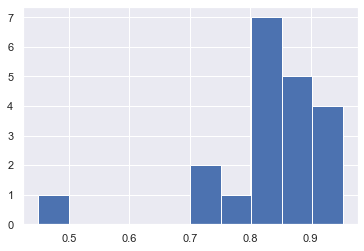

95.0 confidence interval 57.0% and 94.2%


In [1261]:
# plot scores
plt.hist(results)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

## 10. Gradient Descent Boosting Regressor

### 10.1 Normal Gradient Descent Boosting

In [1262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [1263]:
gradboost = GradientBoostingRegressor(random_state = 11)
gradboost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=11, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [1264]:
print(gradboost.score(X_train, y_train))
print(gradboost.score(X_test, y_test))

0.9443905422224312
0.904226753216138


In [1265]:
model_comparison.loc[len(model_comparison)] = 'Gradient Boosting Regressor', round(gradboost.score(X_train, y_train)*100,2), round(gradboost.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                    Linear Regression           77.14       74.76
1      Linear Regression (Column Drop)           74.14       71.21
2           Linear Regression with PCA           73.68       70.48
3                     Ridge Regression           77.14       74.77
4       Ridge Regression (Column Drop)           74.14       71.22
5            Ridge Regression with PCA           73.68       70.49
6                     Lasso Regression           77.02       74.63
7       Lasso Regression (Column Drop)           73.89       70.87
8            Lasso Regression with PCA           73.64       70.43
9   Linear Regression (Polynomial = 2)           82.22       74.42
10   Ridge Regression (Polynomial = 2)           82.22       74.60
11   Lasso Regression (Polynomial = 2)           82.10       74.98
12  Linear Regression (Polynomial = 3)           85.56       69.98
13   Ridge Regression (Polynomial = 3)           85.45       71.64
14   Lasso Regression (Polynomial = 3)           84.67       73.23
15             Decision Tree Regressor           99.40       83.71
16     Decision Tree Regressor (Tuned)           95.60       76.45
17    Decision Tree Regressor with PCA           95.12       67.79
18                       KNN Regressor           88.54       77.55
19                 KNN Regressor Tuned           88.54       77.55
20              KNN Regressor with PCA           88.74       77.09
21                                 SVR           76.03       75.43
22                           SVR Tuned           92.01       87.40
23                         SVR ith PCA           87.31       81.67
24             Random Forest Regressor           97.54       90.35
25       Random Forest Regressor Tuned           98.03       91.02
26    Random Forest Regressor with PCA           96.58       79.28
27                   Bagging Regressor           97.54       88.93
28             Bagging Regressor Tuned           98.07       90.76
29          Bagging Regressor with PCA           97.28       80.74
30         Gradient Boosting Regressor           94.44       90.42

Feature Importance

In [1266]:
feature_importances = gradboost.feature_importances_
feature_names = X.columns
print(feature_names)
print(feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[0.34958054 0.0887283  0.00905212 0.10630439 0.04312796 0.01935426
 0.02184423 0.36200819]


Text(0.5, 1.0, 'FEATURE IMPORTANCES')

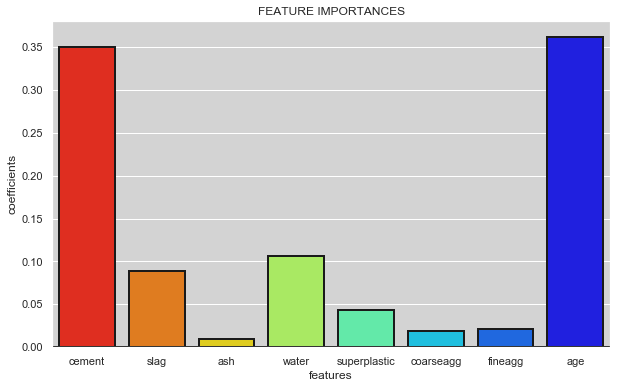

In [1267]:
plt.figure(figsize = (10,6))
coef = pd.DataFrame(gradboost.feature_importances_)
coef["feat"] = X_train.columns
ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
    linewidth=2,edgecolor="k"*coef["feat"].nunique())
ax1.set_facecolor("lightgrey")
ax1.axhline(0,color="k",linewidth=2)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title('FEATURE IMPORTANCES')

### 10.2 Gradient Descent Boosting with Hyperprameter Tuning

In [1268]:
parameters = {'n_estimators': [10, 20, 30, 50, 70, 80, 100],
              'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
              'min_samples_split': [1.0, 2, 3, 5, 10],
              'min_samples_leaf': [1, 2, 3, 5, 10],
              'max_depth': [3, 5, 8],
              'max_features': ['log2', 'sqrt'],
              'criterion' : ['friedman_mse', 'mae'],
              'loss' : ['ls', 'lad', 'huber', 'quantile']}

In [1269]:
gradboostrs = RandomizedSearchCV(GradientBoostingRegressor(),n_iter = 40, param_distributions = parameters, cv = 10)
gradboostrs.fit(X_train, y_train)

D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                           

In [1270]:
print(gradboostrs.score(X_train, y_train))
print(gradboostrs.score(X_test, y_test))

0.9785887616198601
0.933075919473113


In [1271]:
gradboostrs.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'log2',
 'max_depth': 5,
 'loss': 'ls',
 'learning_rate': 0.1,
 'criterion': 'friedman_mse'}

In [1272]:
model_comparison.loc[len(model_comparison)] = 'Gradient Boosting Regressor Tuned', round(gradboostrs.score(X_train, y_train)*100,2), round(gradboostrs.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                    Linear Regression           77.14       74.76
1      Linear Regression (Column Drop)           74.14       71.21
2           Linear Regression with PCA           73.68       70.48
3                     Ridge Regression           77.14       74.77
4       Ridge Regression (Column Drop)           74.14       71.22
5            Ridge Regression with PCA           73.68       70.49
6                     Lasso Regression           77.02       74.63
7       Lasso Regression (Column Drop)           73.89       70.87
8            Lasso Regression with PCA           73.64       70.43
9   Linear Regression (Polynomial = 2)           82.22       74.42
10   Ridge Regression (Polynomial = 2)           82.22       74.60
11   Lasso Regression (Polynomial = 2)           82.10       74.98
12  Linear Regression (Polynomial = 3)           85.56       69.98
13   Ridge Regression (Polynomial = 3)           85.45       71.64
14   Lasso Regression (Polynomial = 3)           84.67       73.23
15             Decision Tree Regressor           99.40       83.71
16     Decision Tree Regressor (Tuned)           95.60       76.45
17    Decision Tree Regressor with PCA           95.12       67.79
18                       KNN Regressor           88.54       77.55
19                 KNN Regressor Tuned           88.54       77.55
20              KNN Regressor with PCA           88.74       77.09
21                                 SVR           76.03       75.43
22                           SVR Tuned           92.01       87.40
23                         SVR ith PCA           87.31       81.67
24             Random Forest Regressor           97.54       90.35
25       Random Forest Regressor Tuned           98.03       91.02
26    Random Forest Regressor with PCA           96.58       79.28
27                   Bagging Regressor           97.54       88.93
28             Bagging Regressor Tuned           98.07       90.76
29          Bagging Regressor with PCA           97.28       80.74
30         Gradient Boosting Regressor           94.44       90.42
31   Gradient Boosting Regressor Tuned           97.86       93.31

### 10.3 Gradient Descent Boosting Regressor with PCA

In [1273]:
X_train, X_test, y_train, y_test = train_test_split(Xpca6, y, test_size = 0.3, random_state = 11)

In [1274]:
gradboostrs.fit(X_train, y_train)

D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                           

In [1275]:
print(gradboostrs.score(X_train, y_train))
print(gradboostrs.score(X_test, y_test))

0.9882889524645629
0.8191670563938575


In [1276]:
gradboostrs.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 5,
 'loss': 'ls',
 'learning_rate': 0.2,
 'criterion': 'friedman_mse'}

In [1277]:
model_comparison.loc[len(model_comparison)] = 'Gradient Boosting Regressor with PCA', round(gradboostrs.score(X_train, y_train)*100,2), round(gradboostrs.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                      Linear Regression           77.14       74.76
1        Linear Regression (Column Drop)           74.14       71.21
2             Linear Regression with PCA           73.68       70.48
3                       Ridge Regression           77.14       74.77
4         Ridge Regression (Column Drop)           74.14       71.22
5              Ridge Regression with PCA           73.68       70.49
6                       Lasso Regression           77.02       74.63
7         Lasso Regression (Column Drop)           73.89       70.87
8              Lasso Regression with PCA           73.64       70.43
9     Linear Regression (Polynomial = 2)           82.22       74.42
10     Ridge Regression (Polynomial = 2)           82.22       74.60
11     Lasso Regression (Polynomial = 2)           82.10       74.98
12    Linear Regression (Polynomial = 3)           85.56       69.98
13     Ridge Regression (Polynomial = 3)           85.45       71.64
14     Lasso Regression (Polynomial = 3)           84.67       73.23
15               Decision Tree Regressor           99.40       83.71
16       Decision Tree Regressor (Tuned)           95.60       76.45
17      Decision Tree Regressor with PCA           95.12       67.79
18                         KNN Regressor           88.54       77.55
19                   KNN Regressor Tuned           88.54       77.55
20                KNN Regressor with PCA           88.74       77.09
21                                   SVR           76.03       75.43
22                             SVR Tuned           92.01       87.40
23                           SVR ith PCA           87.31       81.67
24               Random Forest Regressor           97.54       90.35
25         Random Forest Regressor Tuned           98.03       91.02
26      Random Forest Regressor with PCA           96.58       79.28
27                     Bagging Regressor           97.54       88.93
28               Bagging Regressor Tuned           98.07       90.76
29            Bagging Regressor with PCA           97.28       80.74
30           Gradient Boosting Regressor           94.44       90.42
31     Gradient Boosting Regressor Tuned           97.86       93.31
32  Gradient Boosting Regressor with PCA           98.83       81.92

### Model Performance at 95% confidence level

In [1278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [1279]:
gradboost = GradientBoostingRegressor(n_estimators=80,min_samples_split=2,min_samples_leaf= 2,max_features='log2',max_depth= 8,
 loss= 'ls',learning_rate= 0.05,criterion='friedman_mse',random_state = 11)

In [1280]:
results = cross_val_score(gradboost, X_test, y_test, cv=20)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.87411828 0.53832041 0.9185373  0.78391557 0.92244571 0.82668775
 0.893044   0.80646203 0.91974937 0.86234944 0.93618308 0.77393396
 0.85766771 0.76298444 0.95874407 0.74378528 0.60240752 0.96994882
 0.86285509 0.93442855]
Accuracy: 83.743% (11.071%)


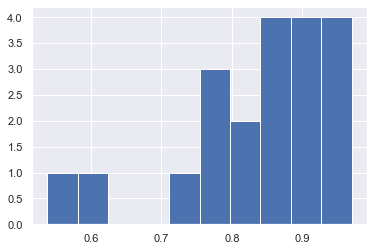

95.0 confidence interval 56.9% and 96.5%


In [1281]:
# plot scores
plt.hist(results)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

## 11. ADA Boosting Regressor

### 11.1 Normal ADABoosting Regressor

In [1282]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [1283]:
adaboost = AdaBoostRegressor(random_state = 11)
adaboost.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=11)

In [1284]:
print(adaboost.score(X_train, y_train))
print(adaboost.score(X_test, y_test))

0.8100976905762011
0.7771756256965379


In [1285]:
model_comparison.loc[len(model_comparison)] = 'Ada Boosting Regressor', round(adaboost.score(X_train, y_train)*100,2), round(adaboost.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                      Linear Regression           77.14       74.76
1        Linear Regression (Column Drop)           74.14       71.21
2             Linear Regression with PCA           73.68       70.48
3                       Ridge Regression           77.14       74.77
4         Ridge Regression (Column Drop)           74.14       71.22
5              Ridge Regression with PCA           73.68       70.49
6                       Lasso Regression           77.02       74.63
7         Lasso Regression (Column Drop)           73.89       70.87
8              Lasso Regression with PCA           73.64       70.43
9     Linear Regression (Polynomial = 2)           82.22       74.42
10     Ridge Regression (Polynomial = 2)           82.22       74.60
11     Lasso Regression (Polynomial = 2)           82.10       74.98
12    Linear Regression (Polynomial = 3)           85.56       69.98
13     Ridge Regression (Polynomial = 3)           85.45       71.64
14     Lasso Regression (Polynomial = 3)           84.67       73.23
15               Decision Tree Regressor           99.40       83.71
16       Decision Tree Regressor (Tuned)           95.60       76.45
17      Decision Tree Regressor with PCA           95.12       67.79
18                         KNN Regressor           88.54       77.55
19                   KNN Regressor Tuned           88.54       77.55
20                KNN Regressor with PCA           88.74       77.09
21                                   SVR           76.03       75.43
22                             SVR Tuned           92.01       87.40
23                           SVR ith PCA           87.31       81.67
24               Random Forest Regressor           97.54       90.35
25         Random Forest Regressor Tuned           98.03       91.02
26      Random Forest Regressor with PCA           96.58       79.28
27                     Bagging Regressor           97.54       88.93
28               Bagging Regressor Tuned           98.07       90.76
29            Bagging Regressor with PCA           97.28       80.74
30           Gradient Boosting Regressor           94.44       90.42
31     Gradient Boosting Regressor Tuned           97.86       93.31
32  Gradient Boosting Regressor with PCA           98.83       81.92
33                Ada Boosting Regressor           81.01       77.72

Feature Importance

In [1286]:
feature_importances = adaboost.feature_importances_
feature_names = X.columns
print(feature_names)
print(feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[0.36563112 0.11732229 0.         0.13966093 0.02727458 0.02694192
 0.0236759  0.29949325]


Text(0.5, 1.0, 'FEATURE IMPORTANCES')

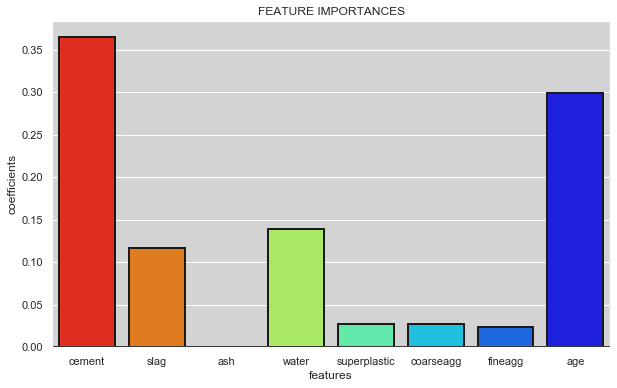

In [1287]:
plt.figure(figsize = (10,6))
coef = pd.DataFrame(adaboost.feature_importances_)
coef["feat"] = X_train.columns
ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
    linewidth=2,edgecolor="k"*coef["feat"].nunique())
ax1.set_facecolor("lightgrey")
ax1.axhline(0,color="k",linewidth=2)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title('FEATURE IMPORTANCES')

### 11.2 ADA Boosting Regressor with Hyper Parameter Tuning

In [1288]:
parameters = { 'n_estimators': [30,40,60,70],
 'loss': ['linear','square','exponential'],
  'learning_rate': [1,1.5]}
ada_cv = GridSearchCV(AdaBoostRegressor(), param_grid = parameters, cv = 10)

In [1289]:
ada_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [1, 1.5],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [30, 40, 60, 70]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [1290]:
print(ada_cv.score(X_train, y_train))
print(ada_cv.score(X_test, y_test))

0.8316707227351624
0.7971337705151013


In [1291]:
ada_cv.best_params_

{'learning_rate': 1.5, 'loss': 'square', 'n_estimators': 60}

In [1292]:
model_comparison.loc[len(model_comparison)] = 'Ada Boosting Regressor Tuned', round(ada_cv.score(X_train, y_train)*100,2), round(ada_cv.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                      Linear Regression           77.14       74.76
1        Linear Regression (Column Drop)           74.14       71.21
2             Linear Regression with PCA           73.68       70.48
3                       Ridge Regression           77.14       74.77
4         Ridge Regression (Column Drop)           74.14       71.22
5              Ridge Regression with PCA           73.68       70.49
6                       Lasso Regression           77.02       74.63
7         Lasso Regression (Column Drop)           73.89       70.87
8              Lasso Regression with PCA           73.64       70.43
9     Linear Regression (Polynomial = 2)           82.22       74.42
10     Ridge Regression (Polynomial = 2)           82.22       74.60
11     Lasso Regression (Polynomial = 2)           82.10       74.98
12    Linear Regression (Polynomial = 3)           85.56       69.98
13     Ridge Regression (Polynomial = 3)           85.45       71.64
14     Lasso Regression (Polynomial = 3)           84.67       73.23
15               Decision Tree Regressor           99.40       83.71
16       Decision Tree Regressor (Tuned)           95.60       76.45
17      Decision Tree Regressor with PCA           95.12       67.79
18                         KNN Regressor           88.54       77.55
19                   KNN Regressor Tuned           88.54       77.55
20                KNN Regressor with PCA           88.74       77.09
21                                   SVR           76.03       75.43
22                             SVR Tuned           92.01       87.40
23                           SVR ith PCA           87.31       81.67
24               Random Forest Regressor           97.54       90.35
25         Random Forest Regressor Tuned           98.03       91.02
26      Random Forest Regressor with PCA           96.58       79.28
27                     Bagging Regressor           97.54       88.93
28               Bagging Regressor Tuned           98.07       90.76
29            Bagging Regressor with PCA           97.28       80.74
30           Gradient Boosting Regressor           94.44       90.42
31     Gradient Boosting Regressor Tuned           97.86       93.31
32  Gradient Boosting Regressor with PCA           98.83       81.92
33                Ada Boosting Regressor           81.01       77.72
34          Ada Boosting Regressor Tuned           83.17       79.71

### 11.3 Ada boosting regressor with PCA

In [1293]:
X_train, X_test, y_train, y_test = train_test_split(Xpca6, y, test_size = 0.3, random_state = 11)

In [1294]:
ada_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [1, 1.5],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [30, 40, 60, 70]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [1295]:
print(ada_cv.score(X_train, y_train))
print(ada_cv.score(X_test, y_test))

0.7671361972882785
0.7120576326780548


In [1296]:
ada_cv.best_params_

{'learning_rate': 1.5, 'loss': 'square', 'n_estimators': 40}

In [1297]:
model_comparison.loc[len(model_comparison)] = 'Ada Boosting Regressor with PCA', round(ada_cv.score(X_train, y_train)*100,2), round(ada_cv.score(X_test, y_test)*100,2)
model_comparison

Model Type  Training Score  Test Score
0                      Linear Regression           77.14       74.76
1        Linear Regression (Column Drop)           74.14       71.21
2             Linear Regression with PCA           73.68       70.48
3                       Ridge Regression           77.14       74.77
4         Ridge Regression (Column Drop)           74.14       71.22
5              Ridge Regression with PCA           73.68       70.49
6                       Lasso Regression           77.02       74.63
7         Lasso Regression (Column Drop)           73.89       70.87
8              Lasso Regression with PCA           73.64       70.43
9     Linear Regression (Polynomial = 2)           82.22       74.42
10     Ridge Regression (Polynomial = 2)           82.22       74.60
11     Lasso Regression (Polynomial = 2)           82.10       74.98
12    Linear Regression (Polynomial = 3)           85.56       69.98
13     Ridge Regression (Polynomial = 3)           85.45       71.64
14     Lasso Regression (Polynomial = 3)           84.67       73.23
15               Decision Tree Regressor           99.40       83.71
16       Decision Tree Regressor (Tuned)           95.60       76.45
17      Decision Tree Regressor with PCA           95.12       67.79
18                         KNN Regressor           88.54       77.55
19                   KNN Regressor Tuned           88.54       77.55
20                KNN Regressor with PCA           88.74       77.09
21                                   SVR           76.03       75.43
22                             SVR Tuned           92.01       87.40
23                           SVR ith PCA           87.31       81.67
24               Random Forest Regressor           97.54       90.35
25         Random Forest Regressor Tuned           98.03       91.02
26      Random Forest Regressor with PCA           96.58       79.28
27                     Bagging Regressor           97.54       88.93
28               Bagging Regressor Tuned           98.07       90.76
29            Bagging Regressor with PCA           97.28       80.74
30           Gradient Boosting Regressor           94.44       90.42
31     Gradient Boosting Regressor Tuned           97.86       93.31
32  Gradient Boosting Regressor with PCA           98.83       81.92
33                Ada Boosting Regressor           81.01       77.72
34          Ada Boosting Regressor Tuned           83.17       79.71
35       Ada Boosting Regressor with PCA           76.71       71.21

### Model Performance at 95% confidence level

In [1298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [1299]:
adaboost = AdaBoostRegressor(learning_rate= 1.5, loss= 'square', n_estimators= 70,random_state = 11)

In [1300]:
results = cross_val_score(adaboost, X_test, y_test, cv=20)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.79712805 0.45104811 0.87369616 0.76784931 0.80726201 0.84037461
 0.77964602 0.8221279  0.87276877 0.83161692 0.87675577 0.66272334
 0.79633783 0.50246355 0.87785244 0.80472053 0.65069475 0.88146623
 0.79921655 0.88489191]
Accuracy: 77.903% (11.913%)


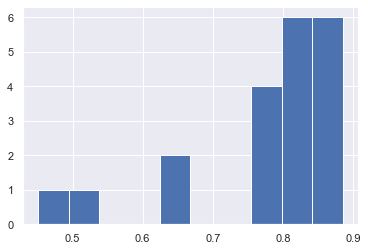

95.0 confidence interval 47.5% and 88.3%


In [1301]:
# plot scores
plt.hist(results)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

## Exploring Guassians in the data

In [1303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [1306]:
cluster_range = range( 2, 6 )   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(data_new)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

num_clusters  cluster_errors
0             2    3.261611e+07
1             3    2.456537e+07
2             4    1.859978e+07
3             5    1.627322e+07

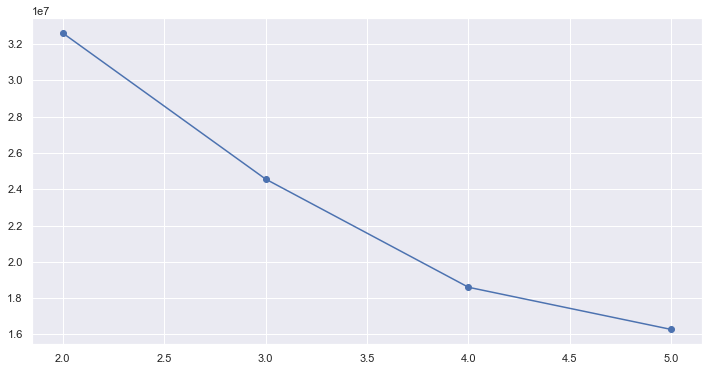

In [1307]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

The elbow plot confirms our visual analysis that there are likely 3 or 4 good clusters. Starting with 3 clusters.

In [1308]:
cluster = KMeans( n_clusters = 3, random_state = 11 )
cluster.fit(df_scaled)

prediction=cluster.predict(df_scaled)
df_scaled["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

mdf_scaled_copy = df_scaled.copy(deep = True)

In [1309]:
centroids = cluster.cluster_centers_
centroids

array([[-0.08613813, -0.34976618,  1.08817611,  0.18029732,  0.11274438,
         0.29059191,  0.34431557,  0.09946813],
       [ 0.44045209,  0.41385644, -0.88288684,  0.40126217, -0.53320827,
         0.32668896,  0.26888767, -0.04913214],
       [-1.86072265, -0.51063248, -0.48534912, -2.88658751,  2.21359848,
        -3.01221448, -2.96333558, -0.20616561]])

In [1310]:
centroid_df = pd.DataFrame(centroids, columns = list(data_new) )
centroid_df

cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0 -0.086138 -0.349766  1.088176  0.180297      0.112744   0.290592  0.344316   
1  0.440452  0.413856 -0.882887  0.401262     -0.533208   0.326689  0.268888   
2 -1.860723 -0.510632 -0.485349 -2.886588      2.213598  -3.012214 -2.963336   

        age  
0  0.099468  
1 -0.049132  
2 -0.206166

Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the centroids and the data in the cluster into box plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A85A8AD0B8>,
      dtype=object)

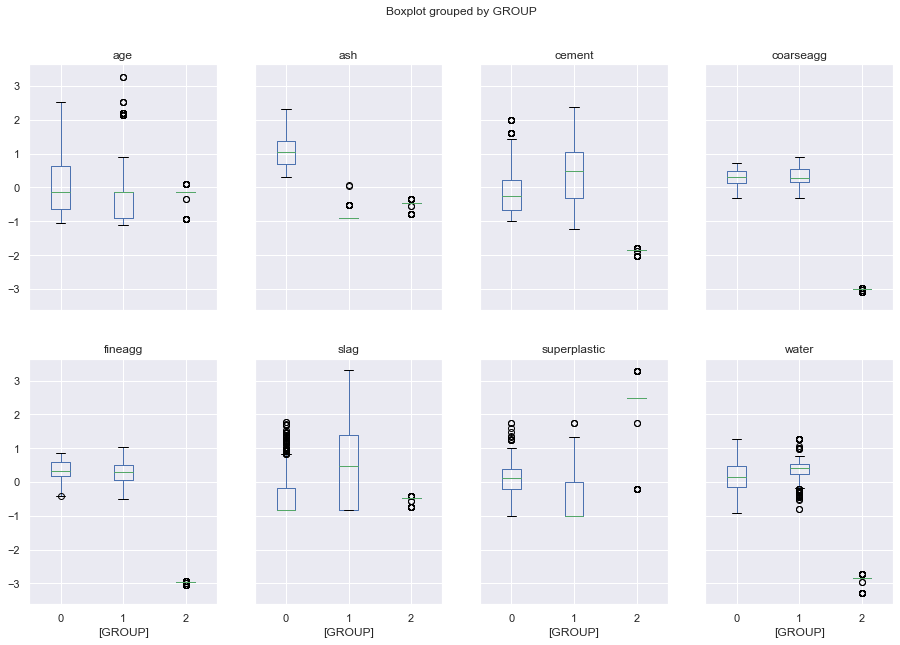

In [1311]:
df_scaled.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

There are many outliers on each dimension  (indicated by the black circles).
Spread of data on each dimension (indivated by the whiskers is long ... due to the outliers). If the outliers are addressed, the clusters will overlap much less than right now (except in year dimension which has no outlier).

In [1312]:
# Addressing outliers at group level

df_scaled_ot = df_scaled
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std #Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (df_scaled_ot.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(df_scaled['GROUP']))

D:\PGP-AIML\Python_Installation\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A85AB27358>,
      dtype=object)

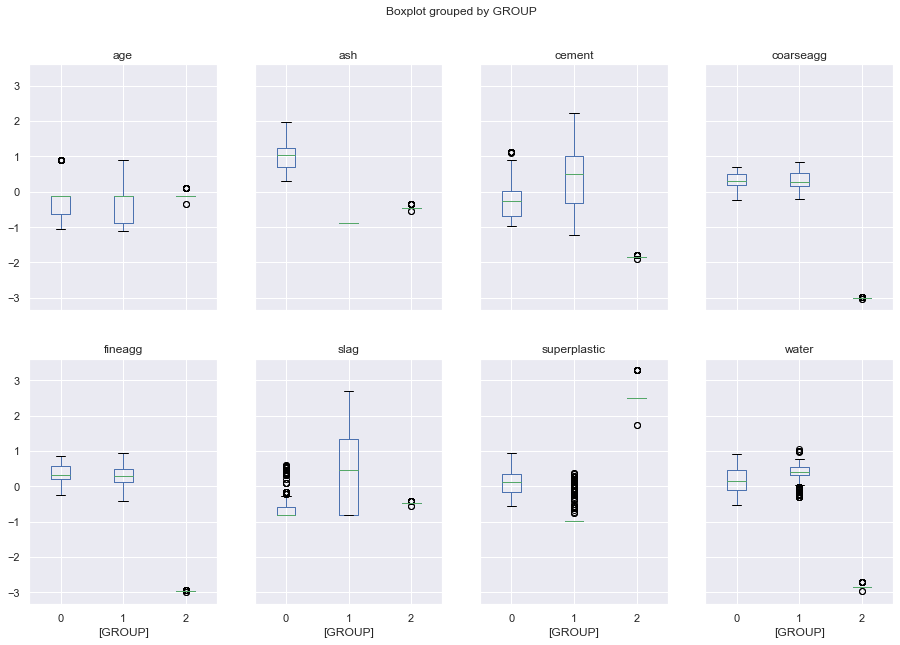

In [1313]:
concat_data.boxplot(by = 'GROUP', layout=(2,4), figsize=(15, 10))

Analyzing cement column with other independent variables group wise

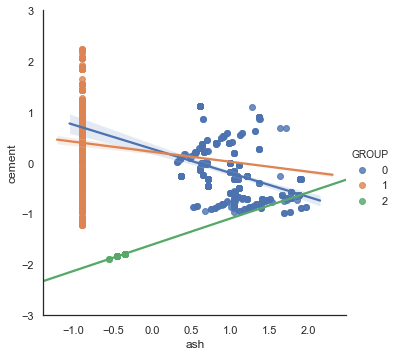

In [1317]:
var = 'ash'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'cement',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

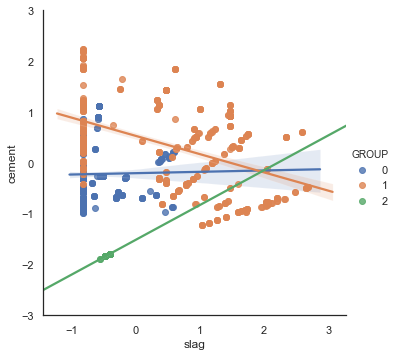

In [1318]:
var = 'slag'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'cement',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

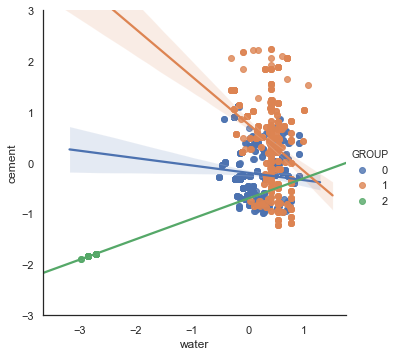

In [1319]:
var = 'water'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'cement',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

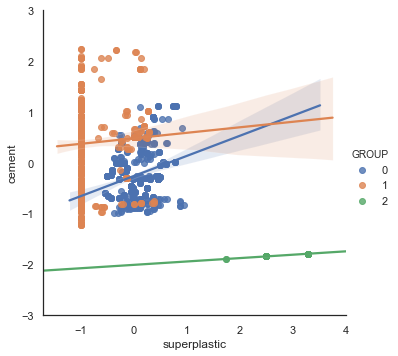

In [1320]:
var = 'superplastic'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'cement',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

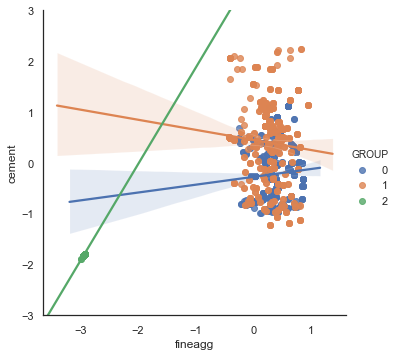

In [1321]:
var = 'fineagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'cement',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

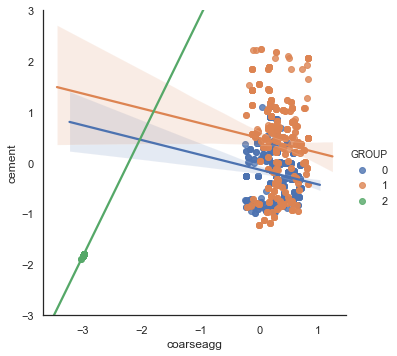

In [1322]:
var = 'coarseagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'cement',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

In [1324]:
# Let us break the data into 3 different groups

largestrength = concat_data[concat_data['GROUP']==0]
smallstrength = concat_data[concat_data['GROUP']==1]
mediumstrength = concat_data[concat_data['GROUP']==2]

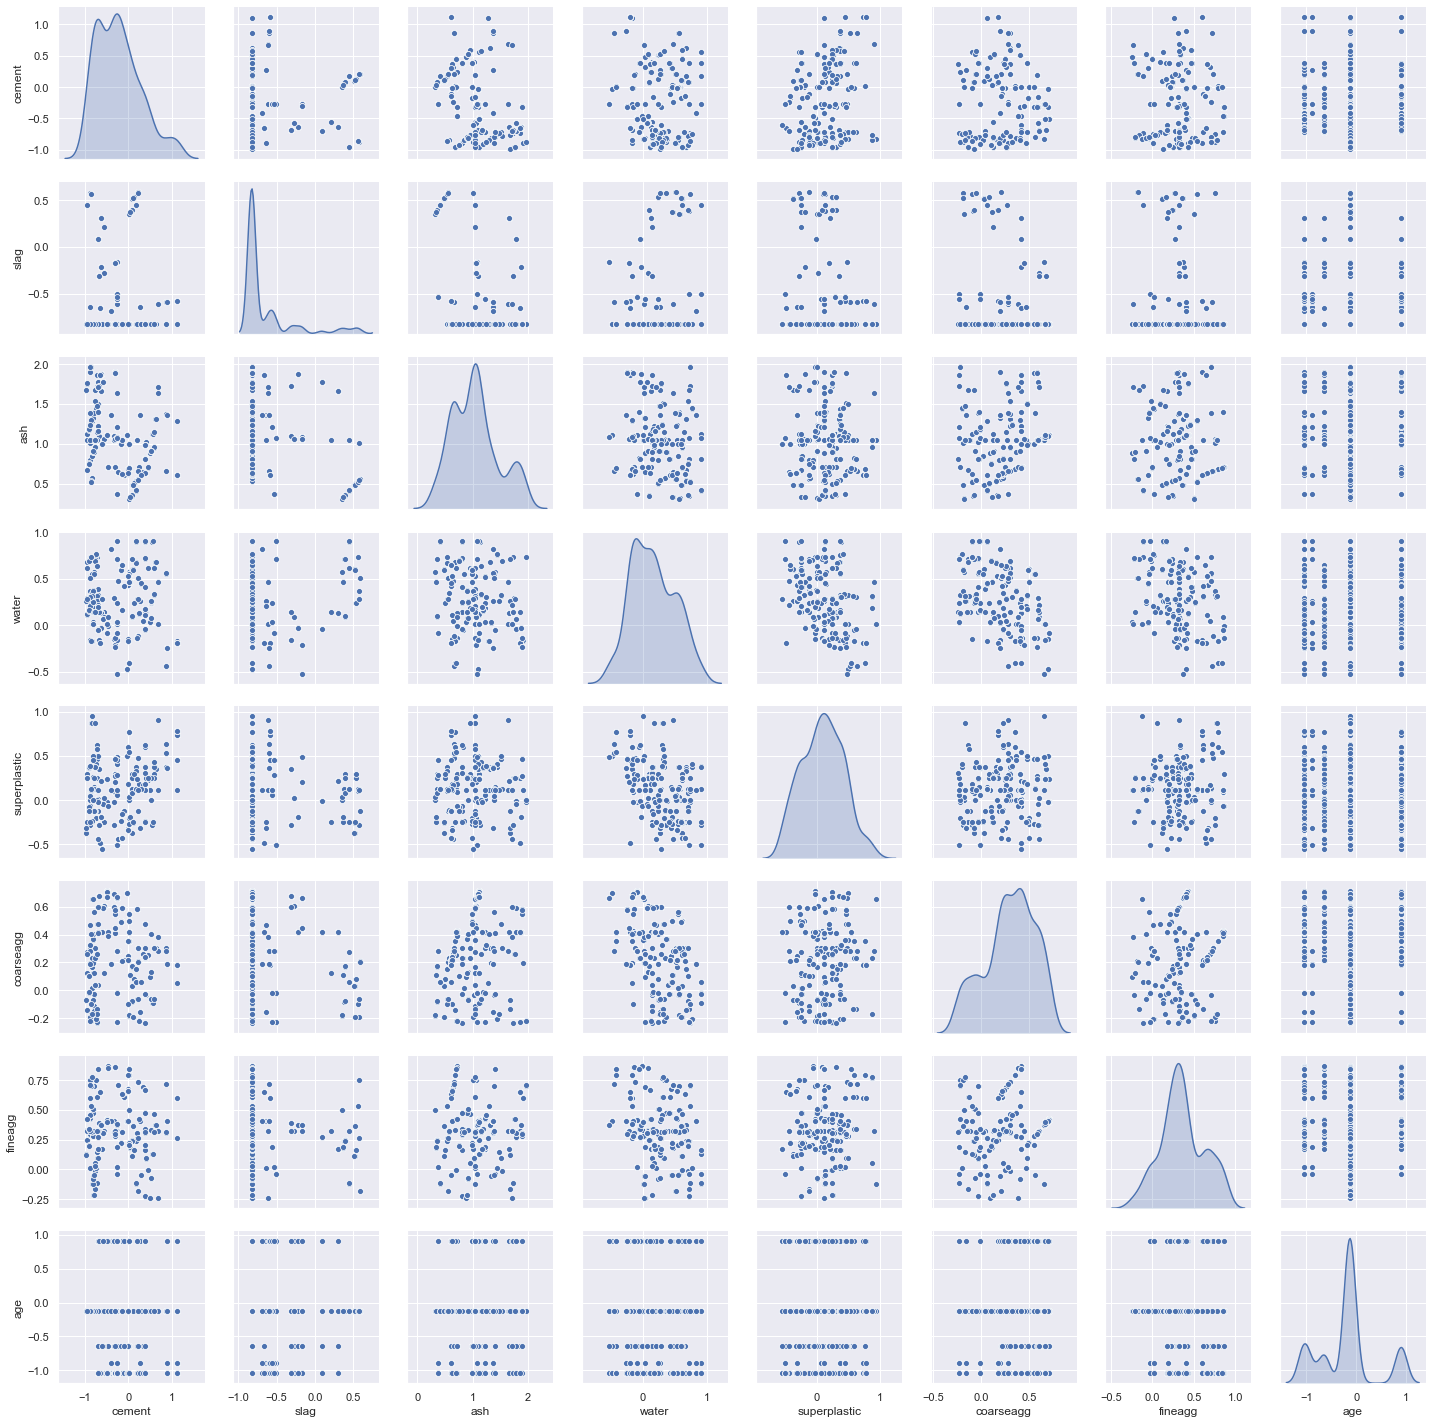

In [1331]:
# Let us look at largestrength pair panel

df_large = largestrength.iloc[:, 0:8]   # CHANGE THE STRENGTH TYPE AT THIS POINT TO CHECK HOW THE MODEL PERFORMS FOR EACH GROUP

sns.pairplot(df_large, diag_kind='kde')   # to plot density curve instead of histogram

In [1332]:
df_large.shape

(442, 8)

In [1333]:
clr = SVR()  
array = df_large.values
X = array[:,1:7] 
y = array[:,0]   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
clr.fit(X_train , y_train)
y_pred = clr.predict(X_test)

D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


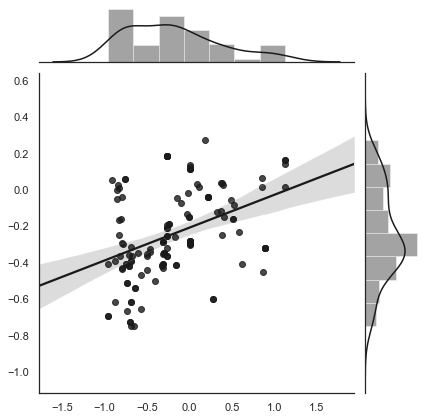

In [1334]:
sns.set(style="darkgrid", color_codes=True)
       
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

Most of the attributes are now showing almost gaussian distribution. The interaction between dimensions too is relatively more linear. But there is a lot of spread.

In [1339]:
# Let us break the data into large strength and small strength segments

df_largestrength = df_concrete[df_concrete['strength'] >= 40]   
df_smallstrentgh = df_concrete[df_concrete['strength'] < 40]

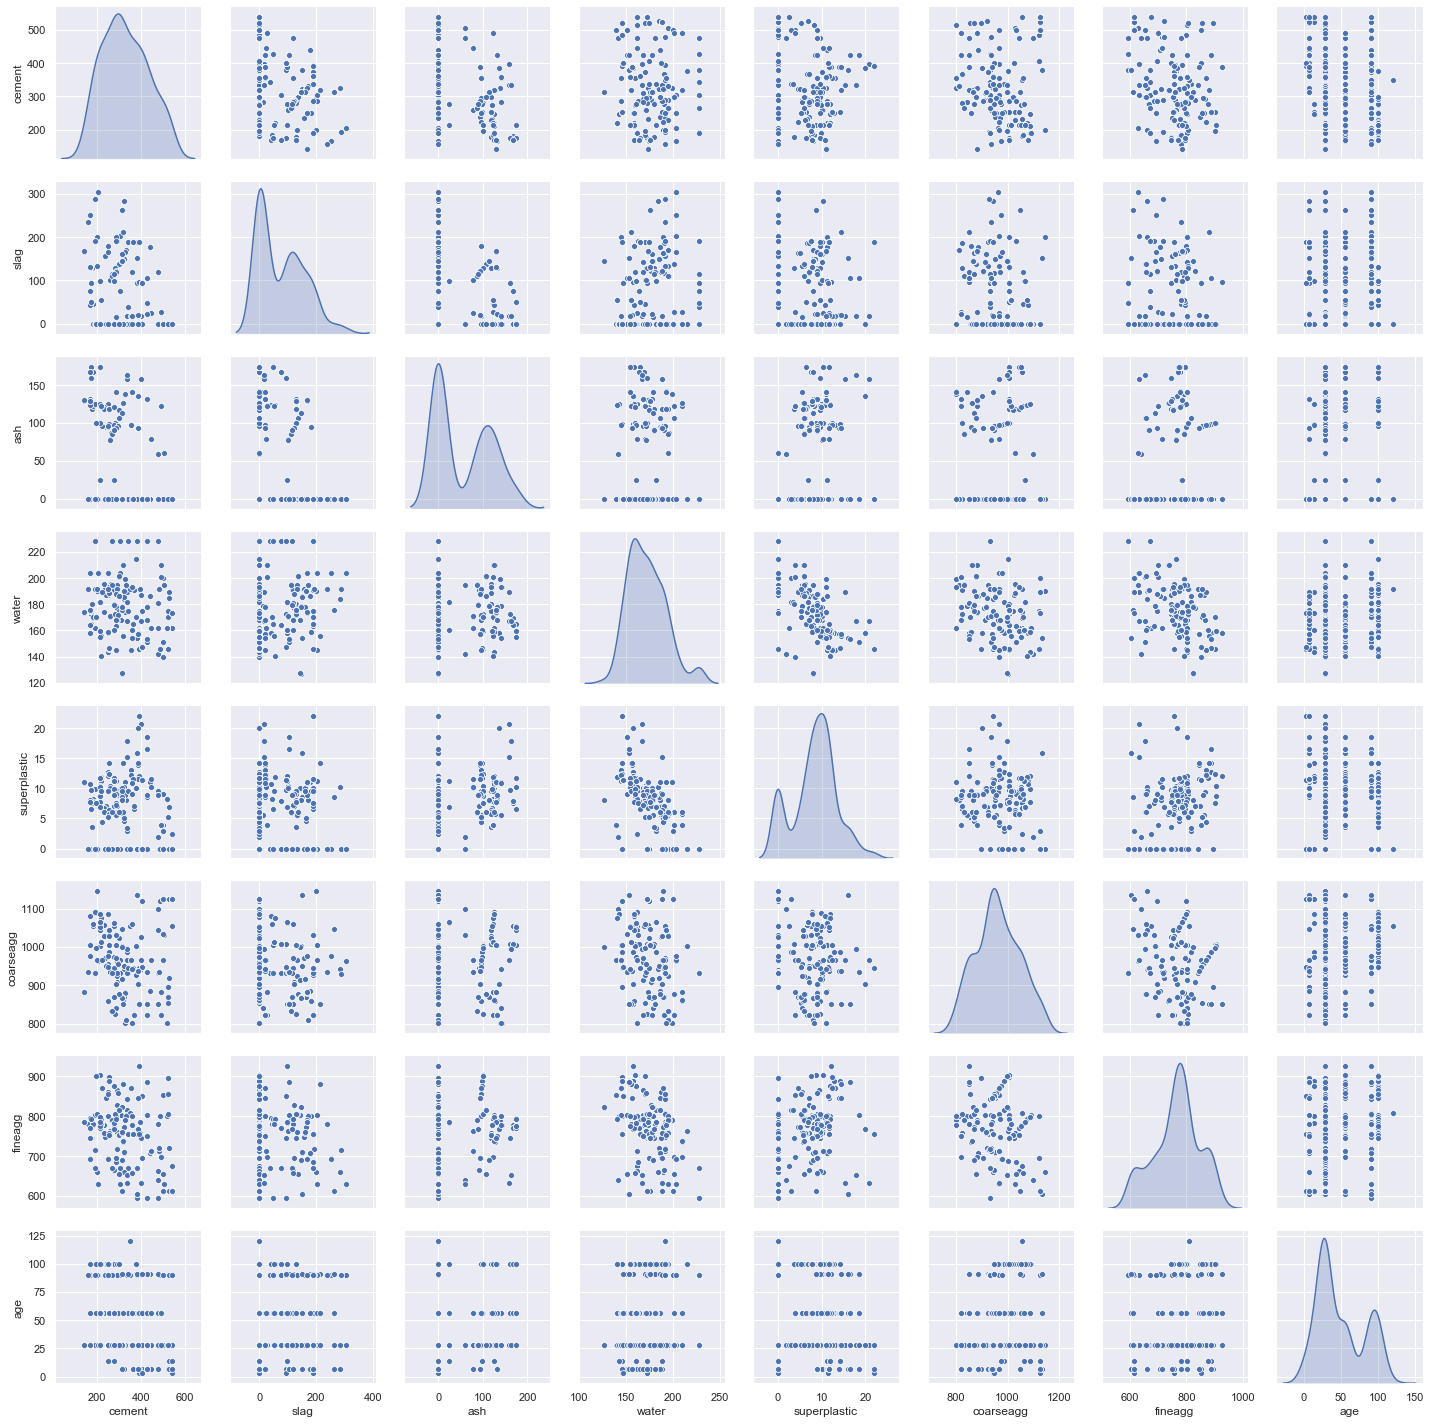

In [1342]:
# Let us look at large strength pair panel

df_concrete_new = df_largestrength.iloc[:, 0:8]

sns.pairplot(df_concrete_new, diag_kind='kde')   

In [1343]:
array = df_concrete_new.values
X = array[:,1:7] 
y = array[:,0]   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [1344]:
clr = SVR()  
clr.fit(X_train , y_train)

D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [1345]:
y_pred = clr.predict(X_test)

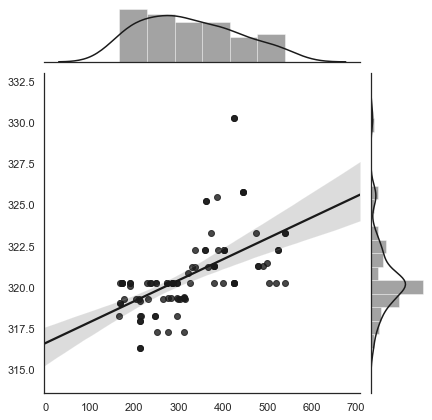

In [1346]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [1348]:
cols_to_drop = ["water", "coarseagg", "fineagg"]

cement_attr = df_concrete_new.drop(cols_to_drop , axis = 1)

cement_strength = np.array(cement_attr.pop('cement'))

In [1349]:
cov_matrix = np.cov(cement_attr, rowvar=False)
np.linalg.eig(cov_matrix)
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
eig_pairs.sort()
eig_pairs.reverse()   
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [1350]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  
cum_var_exp = np.cumsum(var_explained)
cum_var_exp

array([0.70265282, 0.91332796, 0.99804523, 1.        ])

In [1352]:
cement_strength = cement_strength.reshape(len(cement_strength), 1)
eigen_space = np.array(eigvectors_sort[0:1]).transpose()
proj_data_3D = np.dot(cement_attr, eigen_space)
names = ['pc1', 'cement']
cement_pca_array = np.concatenate((proj_data_3D, cement_strength), axis=1)
cement_pca_df = pd.DataFrame(cement_pca_array ,columns=names)
X = cement_pca_array[:,0:1] 
y = cement_pca_array[:,1]  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [1353]:
clr = SVR()  
clr.fit(X_train , y_train)

D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

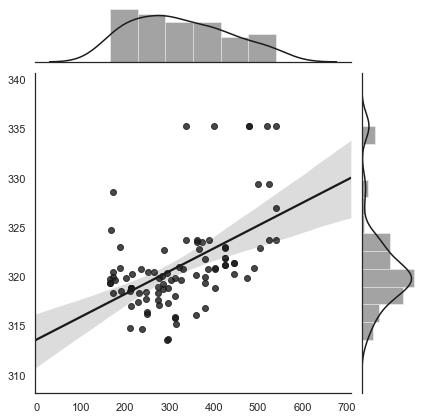

In [1354]:
y_pred = clr.predict(X_test)            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

## Conclusion

In [1355]:
model_comparison

Model Type  Training Score  Test Score
0                      Linear Regression           77.14       74.76
1        Linear Regression (Column Drop)           74.14       71.21
2             Linear Regression with PCA           73.68       70.48
3                       Ridge Regression           77.14       74.77
4         Ridge Regression (Column Drop)           74.14       71.22
5              Ridge Regression with PCA           73.68       70.49
6                       Lasso Regression           77.02       74.63
7         Lasso Regression (Column Drop)           73.89       70.87
8              Lasso Regression with PCA           73.64       70.43
9     Linear Regression (Polynomial = 2)           82.22       74.42
10     Ridge Regression (Polynomial = 2)           82.22       74.60
11     Lasso Regression (Polynomial = 2)           82.10       74.98
12    Linear Regression (Polynomial = 3)           85.56       69.98
13     Ridge Regression (Polynomial = 3)           85.45       71.64
14     Lasso Regression (Polynomial = 3)           84.67       73.23
15               Decision Tree Regressor           99.40       83.71
16       Decision Tree Regressor (Tuned)           95.60       76.45
17      Decision Tree Regressor with PCA           95.12       67.79
18                         KNN Regressor           88.54       77.55
19                   KNN Regressor Tuned           88.54       77.55
20                KNN Regressor with PCA           88.74       77.09
21                                   SVR           76.03       75.43
22                             SVR Tuned           92.01       87.40
23                           SVR ith PCA           87.31       81.67
24               Random Forest Regressor           97.54       90.35
25         Random Forest Regressor Tuned           98.03       91.02
26      Random Forest Regressor with PCA           96.58       79.28
27                     Bagging Regressor           97.54       88.93
28               Bagging Regressor Tuned           98.07       90.76
29            Bagging Regressor with PCA           97.28       80.74
30           Gradient Boosting Regressor           94.44       90.42
31     Gradient Boosting Regressor Tuned           97.86       93.31
32  Gradient Boosting Regressor with PCA           98.83       81.92
33                Ada Boosting Regressor           81.01       77.72
34          Ada Boosting Regressor Tuned           83.17       79.71
35       Ada Boosting Regressor with PCA           76.71       71.21

Gradient Descent Bossting Regressor after Hyper Parameter Tuning seems to be the best model for this dataset.